#Bitcoin Prediction

**Author**: Jyoti Yadav

**Date**: Jan 2021

**Email**: jyoti.yadav@studio.unibo.it

#Introduction

The main objective of this task is to predict the next day price of a Bitcoin. Here I will be comparing three models to determine their efficacy at predicting the price of Bitcoin.
The below three algorithms are :
1. Gated recurrent units (GRU)
2. Long short term memory units (LSTM)
3. Bidirectional LSTM units (BiLSTM)

#Project WorkFlow

*   Import Libraries
*   Data Collection
*   Data Analysis
*   Extracting the main features
*   Train Test Split
*   Model Building
*   Evaluation metrics
*   Summary

#Problem Statement

**Cryptocurrency** is a virtual or digital currency used in financial systems. It is secured by cryptography that makes it impossible to be counterfeited or double-spent.

1. It is not issued from a central authority or central banks
2. It is decentralized virtual currencies that can be converted via cryptographic procedures and this make it distinguishable from traditional currencies.
3. No one knows who invented it
4. Ultimate goal is that all transactions are known and agreed upon by the network.


*   Cryptocurrencies are still in their infancy,and it is difficult to predict whether they will ever be widely used in global markets or not. The most prominent cryptocurrency, Bitcoin, was established in 2009 and for more than two years was the sole Blockchain-based cryptocurrency.It went by mostly unused until it was adapted by santoshi nakamoto in 2009 to create a digital cryptocurrency bitcoin.Today, however, there are over 5000 cryptocurrencies and 5.8 million active users in the cryptocurrency industry.Because of its intrinsic nature of mixing encryption technology with monetary units, Bitcoin has recently gotten a lot of attention in the disciplines of economics, cryptography, and computer science
 
 


*   Cryptocurrency prices are difficult to forecast due to price volatility and dynamism around the world there are hundreds of cryptocurrencies that clients use.

The main idea behind these models is to achieve a reliable prediction model that investors can rely on based on historical cryptocurrency prices.

#Dataset

The Dataset has been taken from the yahoo finance. CSV files for select bitcoin exchanges for the time period of 2014-2021, with minute to minute updates of **OHLC (Open, High, Low, Close,Volume)** in BTC and indicated currency.

1. **Date**: timestamp

2. **Open**:  Opening price on the given day

3. **High**:  Highest price on the given day

4. **Low**:   Lowest price on the given day

5. **Close**:  Closing price on the given day

6. **Volume**: Volume of transactions on the given day

To make the prediction on the best performing model the 10 days data has been scraped from the yahoo finance. 

**What is Web Scraping?**

Web Scraping is an automatic way to retrieve unstructured data from a website and store them in a structured format.

#importing important libraries

In [65]:
!pip install kora -q

In [66]:
!pip install selenium

In [67]:
#Imported the Necessary Libraries
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers import Conv2D,Conv1D,MaxPooling2D,MaxPooling1D,Flatten
from sklearn.metrics import mean_absolute_percentage_error
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import InputLayer
from keras.models import Sequential
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from keras import optimizers 
from tensorflow import keras
from kora.selenium import wd
from selenium import webdriver
from bs4 import BeautifulSoup
import tensorflow as tf
import seaborn as sns
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
import numpy as np
# np.random.seed(seed)
%matplotlib inline
plt.style.use('ggplot')
from lxml import html
import requests
import sklearn
import string
import time
seed = 1234
import re

#Read Input File

In [68]:
#Read the Input file
dataframe = pd.read_csv("BTC-USD.csv")

#Data Analysis

In [69]:
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,466,468,452,457,457,21056800
1,2014-09-18,457,457,413,424,424,34483200
2,2014-09-19,424,428,385,395,395,37919700
3,2014-09-20,395,423,390,409,409,36863600
4,2014-09-21,408,412,393,399,399,26580100
...,...,...,...,...,...,...,...
2702,2022-02-09,44097,44728,43233,44339,44339,23245887300
2703,2022-02-10,44348,45661,43403,43565,43565,32142048537
2704,2022-02-11,43571,43811,42115,42408,42408,26954925781
2705,2022-02-12,42412,42993,41853,42244,42244,18152390304


In [70]:
#By analysing the dataset it was observed the that the dataset contains 2707 rows and 7 columns
dataframe.shape

(2707, 7)

In [71]:
dataframe.reset_index(drop=True, inplace=True)

In [72]:
#Checking the datatypes of the columns
dataframe.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [73]:
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,466,468,452,457,457,21056800
1,2014-09-18,457,457,413,424,424,34483200
2,2014-09-19,424,428,385,395,395,37919700
3,2014-09-20,395,423,390,409,409,36863600
4,2014-09-21,408,412,393,399,399,26580100
...,...,...,...,...,...,...,...
2702,2022-02-09,44097,44728,43233,44339,44339,23245887300
2703,2022-02-10,44348,45661,43403,43565,43565,32142048537
2704,2022-02-11,43571,43811,42115,42408,42408,26954925781
2705,2022-02-12,42412,42993,41853,42244,42244,18152390304


In [74]:
dataframe["Date"]

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2702    2022-02-09
2703    2022-02-10
2704    2022-02-11
2705    2022-02-12
2706    2022-02-13
Name: Date, Length: 2707, dtype: object

In [75]:
dataraw=dataframe

In [76]:
dataraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2707 non-null   object 
 1   Open       2707 non-null   float64
 2   High       2707 non-null   float64
 3   Low        2707 non-null   float64
 4   Close      2707 non-null   float64
 5   Adj Close  2707 non-null   float64
 6   Volume     2707 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.2+ KB


In [77]:
#Converting the columns into the float datatype
a=['Open','High','Low','Close','Volume']
for i in a:
  dataraw[i]= dataraw[i].astype(str).astype(float)
dataraw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,466,468,452,457,457,21056800
1,2014-09-18,457,457,413,424,424,34483200
2,2014-09-19,424,428,385,395,395,37919700
3,2014-09-20,395,423,390,409,409,36863600
4,2014-09-21,408,412,393,399,399,26580100
...,...,...,...,...,...,...,...
2702,2022-02-09,44097,44728,43233,44339,44339,23245887300
2703,2022-02-10,44348,45661,43403,43565,43565,32142048537
2704,2022-02-11,43571,43811,42115,42408,42408,26954925781
2705,2022-02-12,42412,42993,41853,42244,42244,18152390304


#Data Cleaning

Since there are empty cell with a value that doesn’t exist.The interpolate is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

The default function to interpolate() is using Linear method.

Linear Interpolation simply means to estimate a missing value by connecting dots in a straight line in increasing order. In short, It estimates the unknown value in the same increasing order from previous values. The default method used by Interpolation is Linear so while applying it we did not need to specify it.

In [78]:
# function to impute missing values using interpolation
def fill_missing(df):
    df['Open'] = df['Open'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Volume'] = df['Volume'].interpolate()
    print('No. of Missing values after interpolation:')
    print(df.isnull().sum())
    
fill_missing(dataraw)

No. of Missing values after interpolation:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [79]:
#calculating missing values in the dataset
missing_values = dataraw.isnull().sum()
missing_per = (missing_values/dataraw.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Date,0,0
Open,0,0
High,0,0
Low,0,0
Close,0,0
Adj Close,0,0
Volume,0,0


In [80]:
dataset=dataraw

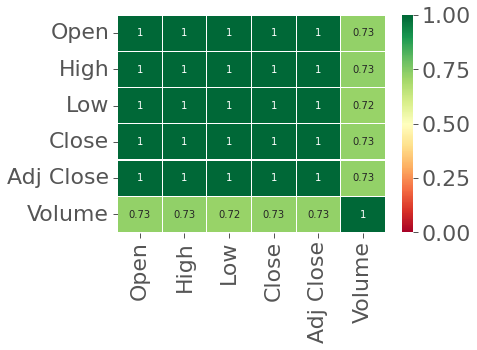

In [81]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

The dataset is highly correlated with Open high Low Close and Adj Close but it is less correlated with Volume

#Convert ‘Date’ to datetime

We must convert the date column to date format

In [82]:
# We see Date is an object, so we have to convert it to datetime
dataset['Date'] = dataset['Date'].astype('datetime64[ns]')

Next, we have to set the column ‘Date’ as the index. Otherwise we will get the following error: invalid type promotion.

In [83]:
# set Date as index
dataset = dataset.set_index('Date')

In [84]:
df=dataset

###let’s take a look at our data. The below Figure presents the evolution of Bitcoin price over time.

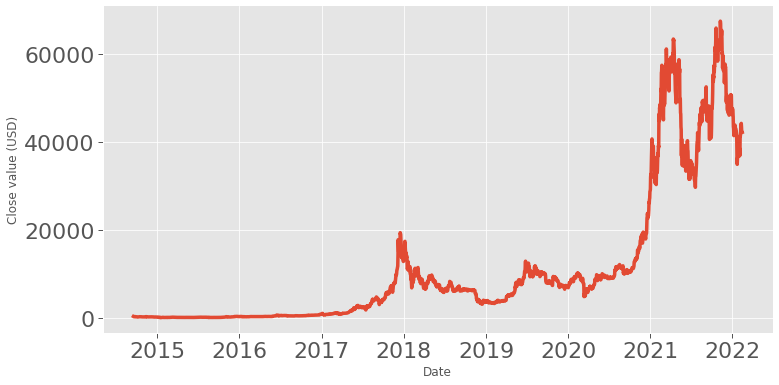

In [85]:
#How close price changes with the date

fig, ax = plt.subplots(figsize=(12,6))
sns.set_context("paper", font_scale=2.5, rc={"lines.linewidth": 3.5})
plt.rcParams['figure.dpi'] = 360
sns.lineplot(data=df, x="Date", y="Close")
plt.xlabel("Date") 
plt.ylabel("Close value (USD)") 
#plt.title("Evolution of Bitcoin price")
horizontalalignment='center'
sns.despine()

It is quite Volatile.

The first step is to shift our outcome variable up (-1) by one timestep. The purpose is to organize our data such that the predictor variables will be used to predict the following days closing price, Tomorrow_close.

In [86]:
#Create variable 'Tomorrow_close' which shifts 'Close' up by 1
df['Tomorrow_Close'] = df['Close'].shift(-1,fill_value=0)

In [87]:
df['Close'].tail()

Date
2022-02-09   44339
2022-02-10   43565
2022-02-11   42408
2022-02-12   42244
2022-02-13   42270
Name: Close, dtype: float64

In [88]:
#drop last row because we shifted value (remember this when you add your forecasting data)
df.drop(df.tail(1).index,inplace=True)

Dropping the unwanted columns

In [89]:
#Dropping the unwanted columns
df = df.drop(columns=['Close'])
df = df.drop(columns=['Adj Close'])

#Splitting the data into Train and Test

Now our data is ready to split into a training set and a test set. I chose an 80/20 split for training and test data, respectively. Let’s take a look at what that gives us

In [90]:
#Split train data (80%) and test data (20%)
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

Dimension of train data:  (2164, 5)
Dimension of test data:  (542, 5)


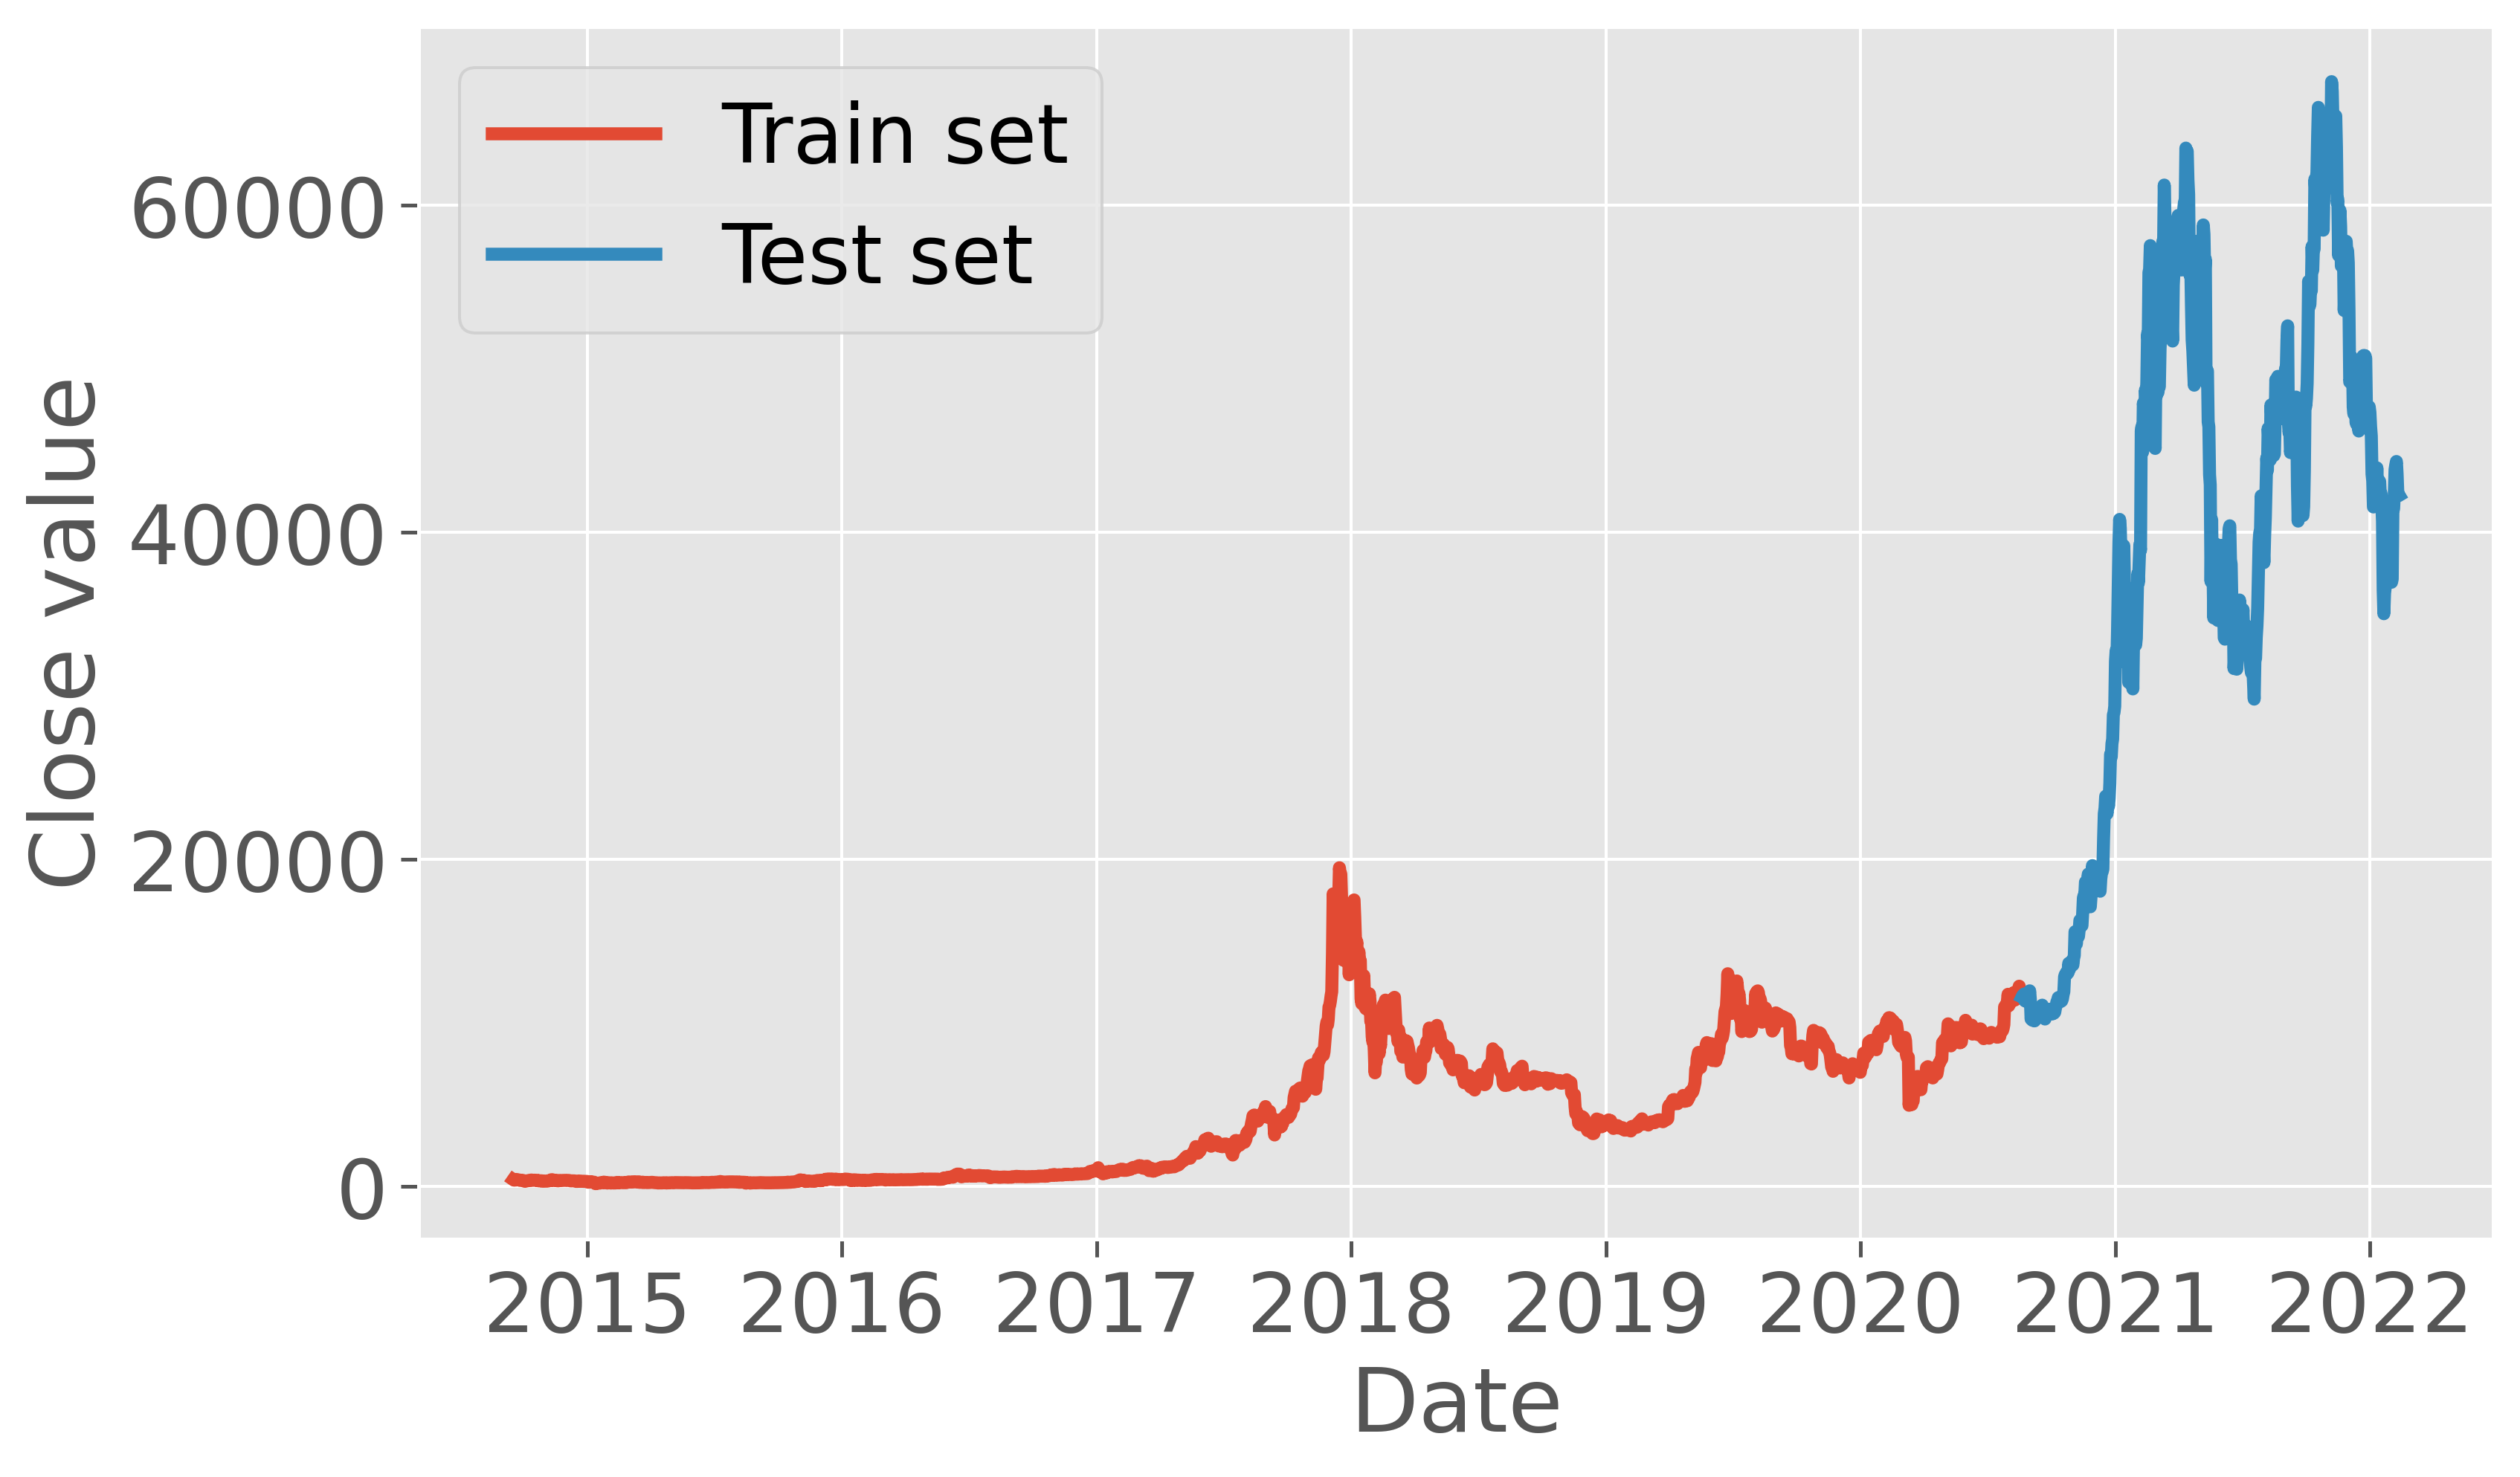

In [91]:
#Plotting the Distribution of Train and Test
plt.figure(figsize = (10, 6))
plt.rcParams['figure.dpi'] = 360
plt.plot(train_dataset.Tomorrow_Close)
plt.plot(test_dataset.Tomorrow_Close)
plt.xlabel('Date')
plt.ylabel('Close value')
plt.legend(['Train set', 'Test set'], loc='upper left')
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [92]:
df

,Open,High,Low,Volume,Tomorrow_Close
Date,,,,,
2014-09-17,466,468,452,21056800,424
2014-09-18,457,457,413,34483200,395
2014-09-19,424,428,385,37919700,409
2014-09-20,395,423,390,36863600,399
2014-09-21,408,412,393,26580100,402
...,...,...,...,...,...
2022-02-08,43855,45294,42808,33079398868,44339
2022-02-09,44097,44728,43233,23245887300,43565
2022-02-10,44348,45661,43403,32142048537,42408


we need to separate our predictor (X) and outcome (y) variables before we start to train our model.

In [93]:
# Split train data to X and y
X_train = train_dataset.drop('Tomorrow_Close', axis = 1)
y_train = train_dataset.loc[:,['Tomorrow_Close']]

# Split test data to X and y
X_test = test_dataset.drop('Tomorrow_Close', axis = 1)
y_test = test_dataset.loc[:,['Tomorrow_Close']]

#Normalizing the dataset

**Feature scaling** is the process of normalising the range of features in a dataset.Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.Since the default activation function for these models is the hyperbolic tangent (tanh) function, which outputs a range from -1 to 1, I scaled values to fit this range. To accomplish this, I used sklearn’s MinMaxScaler.

MinMaxScaler has managed to rescale those features so that their values are bounded between 0 and 1. It is considered good practice to follow these 3 guidelines:

* First, fit the scaler to the training set using the fit() function

* Next, apply the scale to the training set using the transform() function

* Finally,apply the scale to the test set

In [94]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (-1,1))
scaler_y = MinMaxScaler(feature_range = (-1,1))


# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)


# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)


# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

Input data for our models must be 3D with a shape [batch, timestep, feature]. Below, a function called make_sequence reshapes the data into the necessary format. The timestep was set to 10, which means the model will make predictions of ‘Tomorrow_Close’ based on the input from the 10 previous days.

In [95]:
def make_sequence (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)


TIME_STEPS = 10

X_test, y_test = make_sequence(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = make_sequence(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (532, 10, 4)
y_train.shape:  (2154, 1)
X_test.shape:  (532, 10, 4)
y_test.shape:  (2154, 1)


**Recurrent neural networks (RNNs)** have been heavily studied since the 90’s. The bread-and-butter of RNNs is their capacity to deal with sequential data, making them valuable tools to explore tasks involving text, audio, images, videos, and financial markets, such as the one we are about to explore.In RNNs, the outputs can be fed back into the network as inputs creating a recurrent structure.

**A limitation of RNNs** becomes clear when we begin using large amounts of data. For example I have gathered data from roughly 8 years of Bitcoin prices. This means I have more than 2,500 timesteps of input. Consequently, every time the model is updated, derivatives will be calculated on each of those inputs. 

This can cause the weights to drop close to zero (vanishing gradient) or explode (exploding gradient) meaning the model is slow to learn. Because RNNs have difficulty learning early inputs on large datasets, they are said to have short-term memory.
Gradient Vanishing problem

To overcome this problem, specialized RNNs were developed. 
1. Long short term memory units (LSTM)
2. Bidirectional LSTM (BiLSTM)
3. Gated recurrent units (GRU). 

Using internal mechanisms, called gates, these models can regulate how information flows through the network. Ultimately, they decide which information is important to keep or discard.

Finally, will create our 3 models that will be used to predict Bitcoin price. All models were kept simple with two layers containing 64 neurons and a dense layer with 1 neuron. I also added 20% dropout to prevent over-fitting. Finally, I used adam as the optimizing function and mean square error as the metric for these models

Long Short-Term Memory

Long Short-Term Memory (LSTM) is a specialized RNN to mitigate the gradient vanishing problem. LSTMs can learn long-term dependencies using a mechanism called gates. These gates can learn what information in the sequence is important to keep or throw away. LSTMs have three gates; input, forget and output.


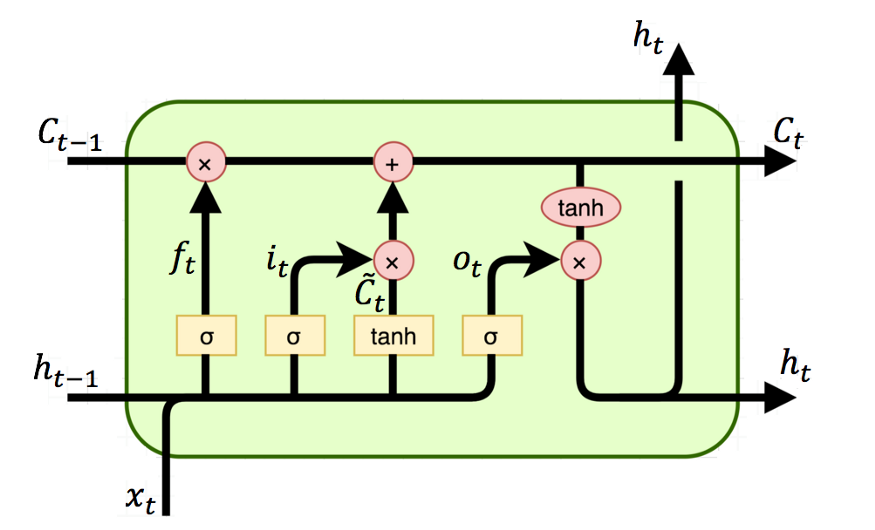




Bidirectional LSTMs

The idea of Bidirectional LSTMs (BiSTM) is to aggregate input information in the past and future of a specific time step in LSTM models. In BiLSTM, at any point in time, you are able to preserve information from both past and future.

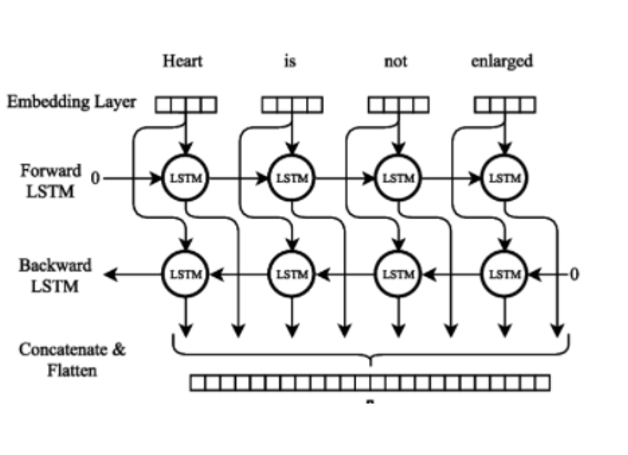

Gated Recurrent Unit

Gated Recurrent Unit (GRU) is a new generation of Neural Networks and is pretty similar to LSTM. GRU gets rid of the cell state and uses a hidden state to transfer information. The other difference between GRU and LSTM is that GRU has only two gates; reset and update gate.

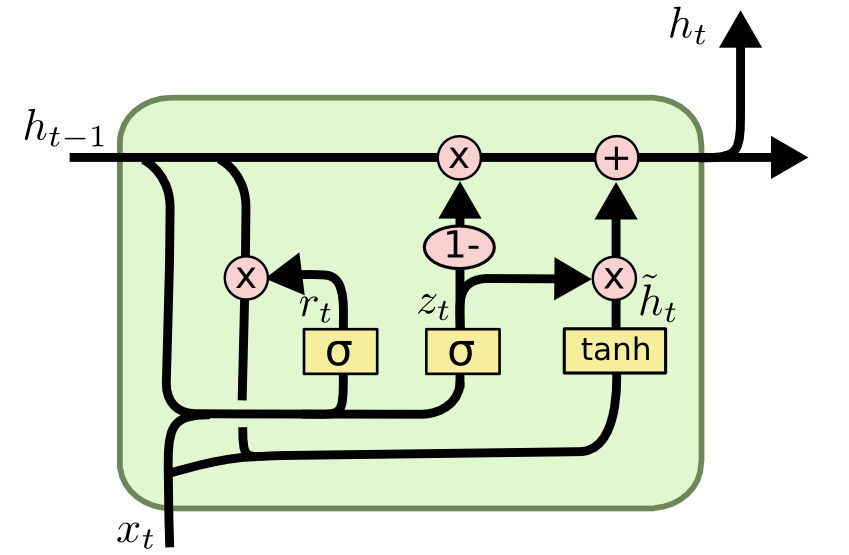

In [96]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()

    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [97]:
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()

    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 

    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))

    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [98]:
# BiLSTM
model_bilstm = create_model_bilstm(64)

In [99]:
# GRU and LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

##Fitting the Model

Now it’s time to fit the models and see how well they predict Bitcoin prices I will be running 100 epoch for these models; however, I added EarlyStopping with a patience of 10, which stops the model from continuing when the validation loss hasn’t improved in 10 epochs. This can save a fair amount of time, when you are working with enormous dataset and we must set shuffle = False

In [100]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
54/54 [==============================] - 26s 217ms/step - loss: 0.0522 - val_loss: 0.0068
Epoch 2/100
54/54 [==============================] - 5s 87ms/step - loss: 0.0124 - val_loss: 0.0077
Epoch 3/100
54/54 [==============================] - 4s 81ms/step - loss: 0.0143 - val_loss: 0.0078
Epoch 4/100
54/54 [==============================] - 4s 79ms/step - loss: 0.0156 - val_loss: 0.0077
Epoch 5/100
54/54 [==============================] - 5s 84ms/step - loss: 0.0168 - val_loss: 0.0076
Epoch 6/100
54/54 [==============================] - 5s 91ms/step - loss: 0.0157 - val_loss: 0.0071
Epoch 7/100
54/54 [==============================] - 4s 81ms/step - loss: 0.0131 - val_loss: 0.0083
Epoch 8/100
54/54 [==============================] - 4s 68ms/step - loss: 0.0116 - val_loss: 0.0078
Epoch 9/100
54/54 [==============================] - 4s 71ms/step - loss: 0.0093 - val_loss: 0.0192
Epoch 10/100
54/54 [==============================] - 4s 65ms/step - loss: 0.0194 - val_loss: 0.00

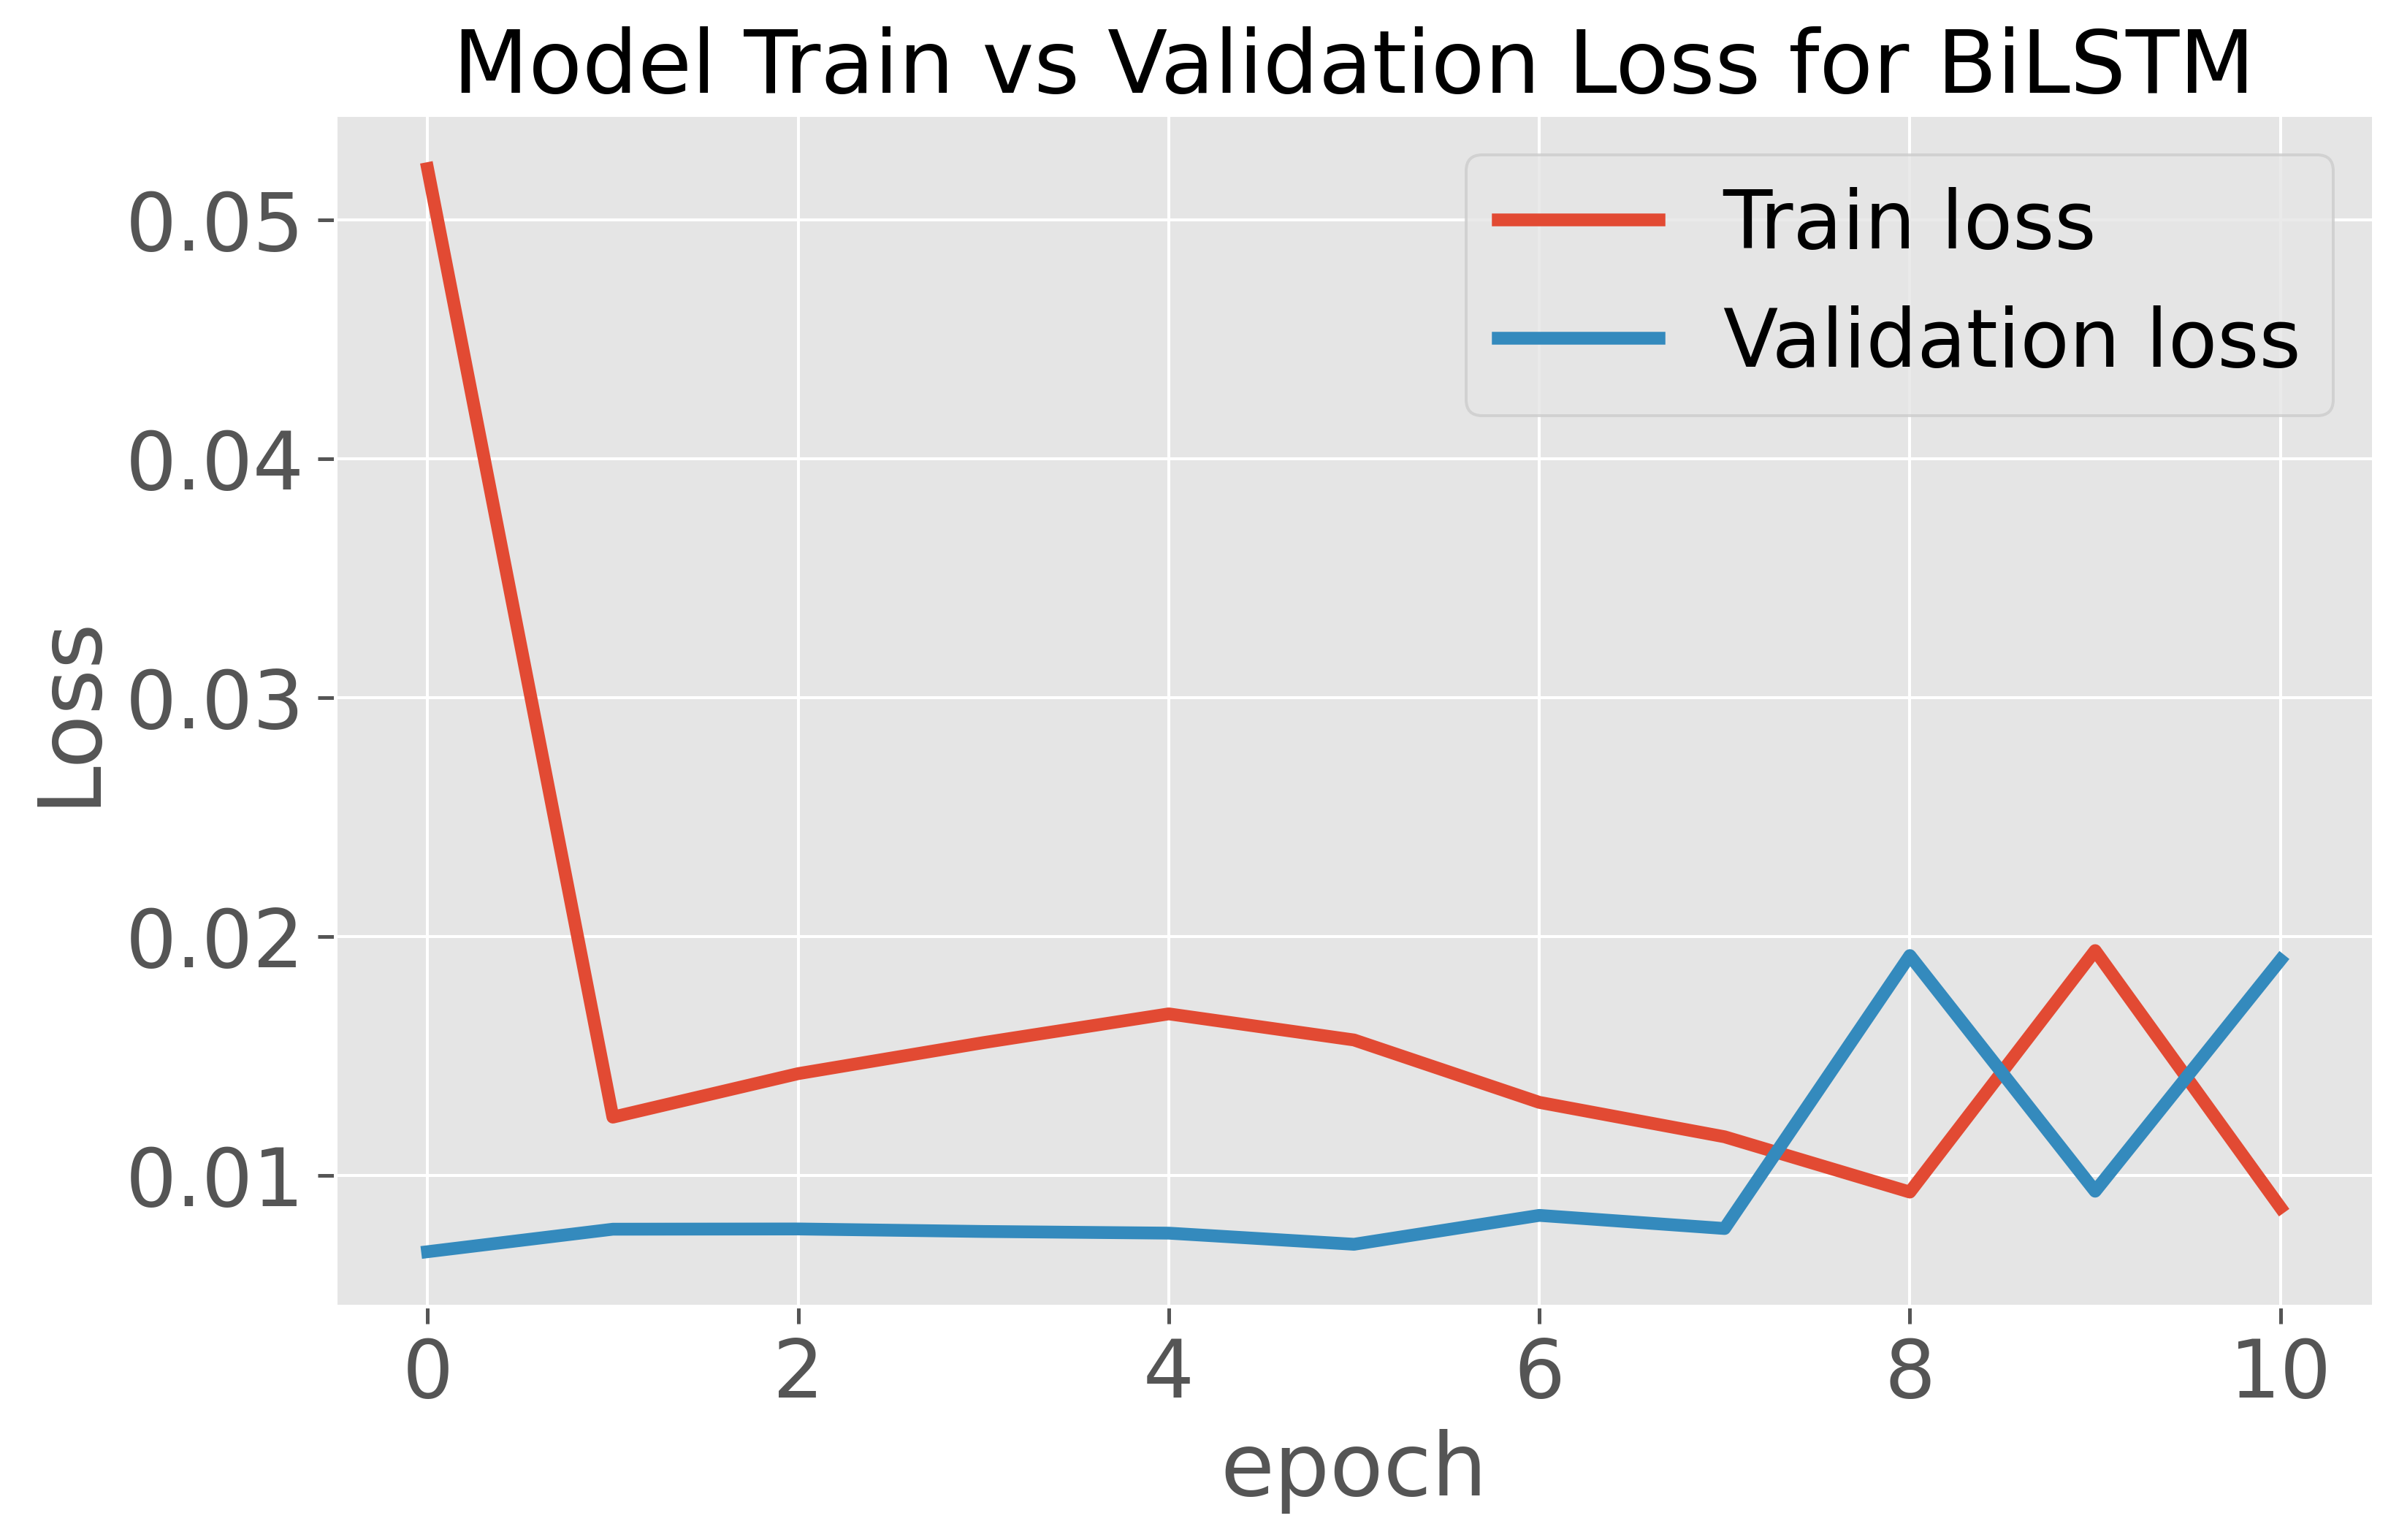

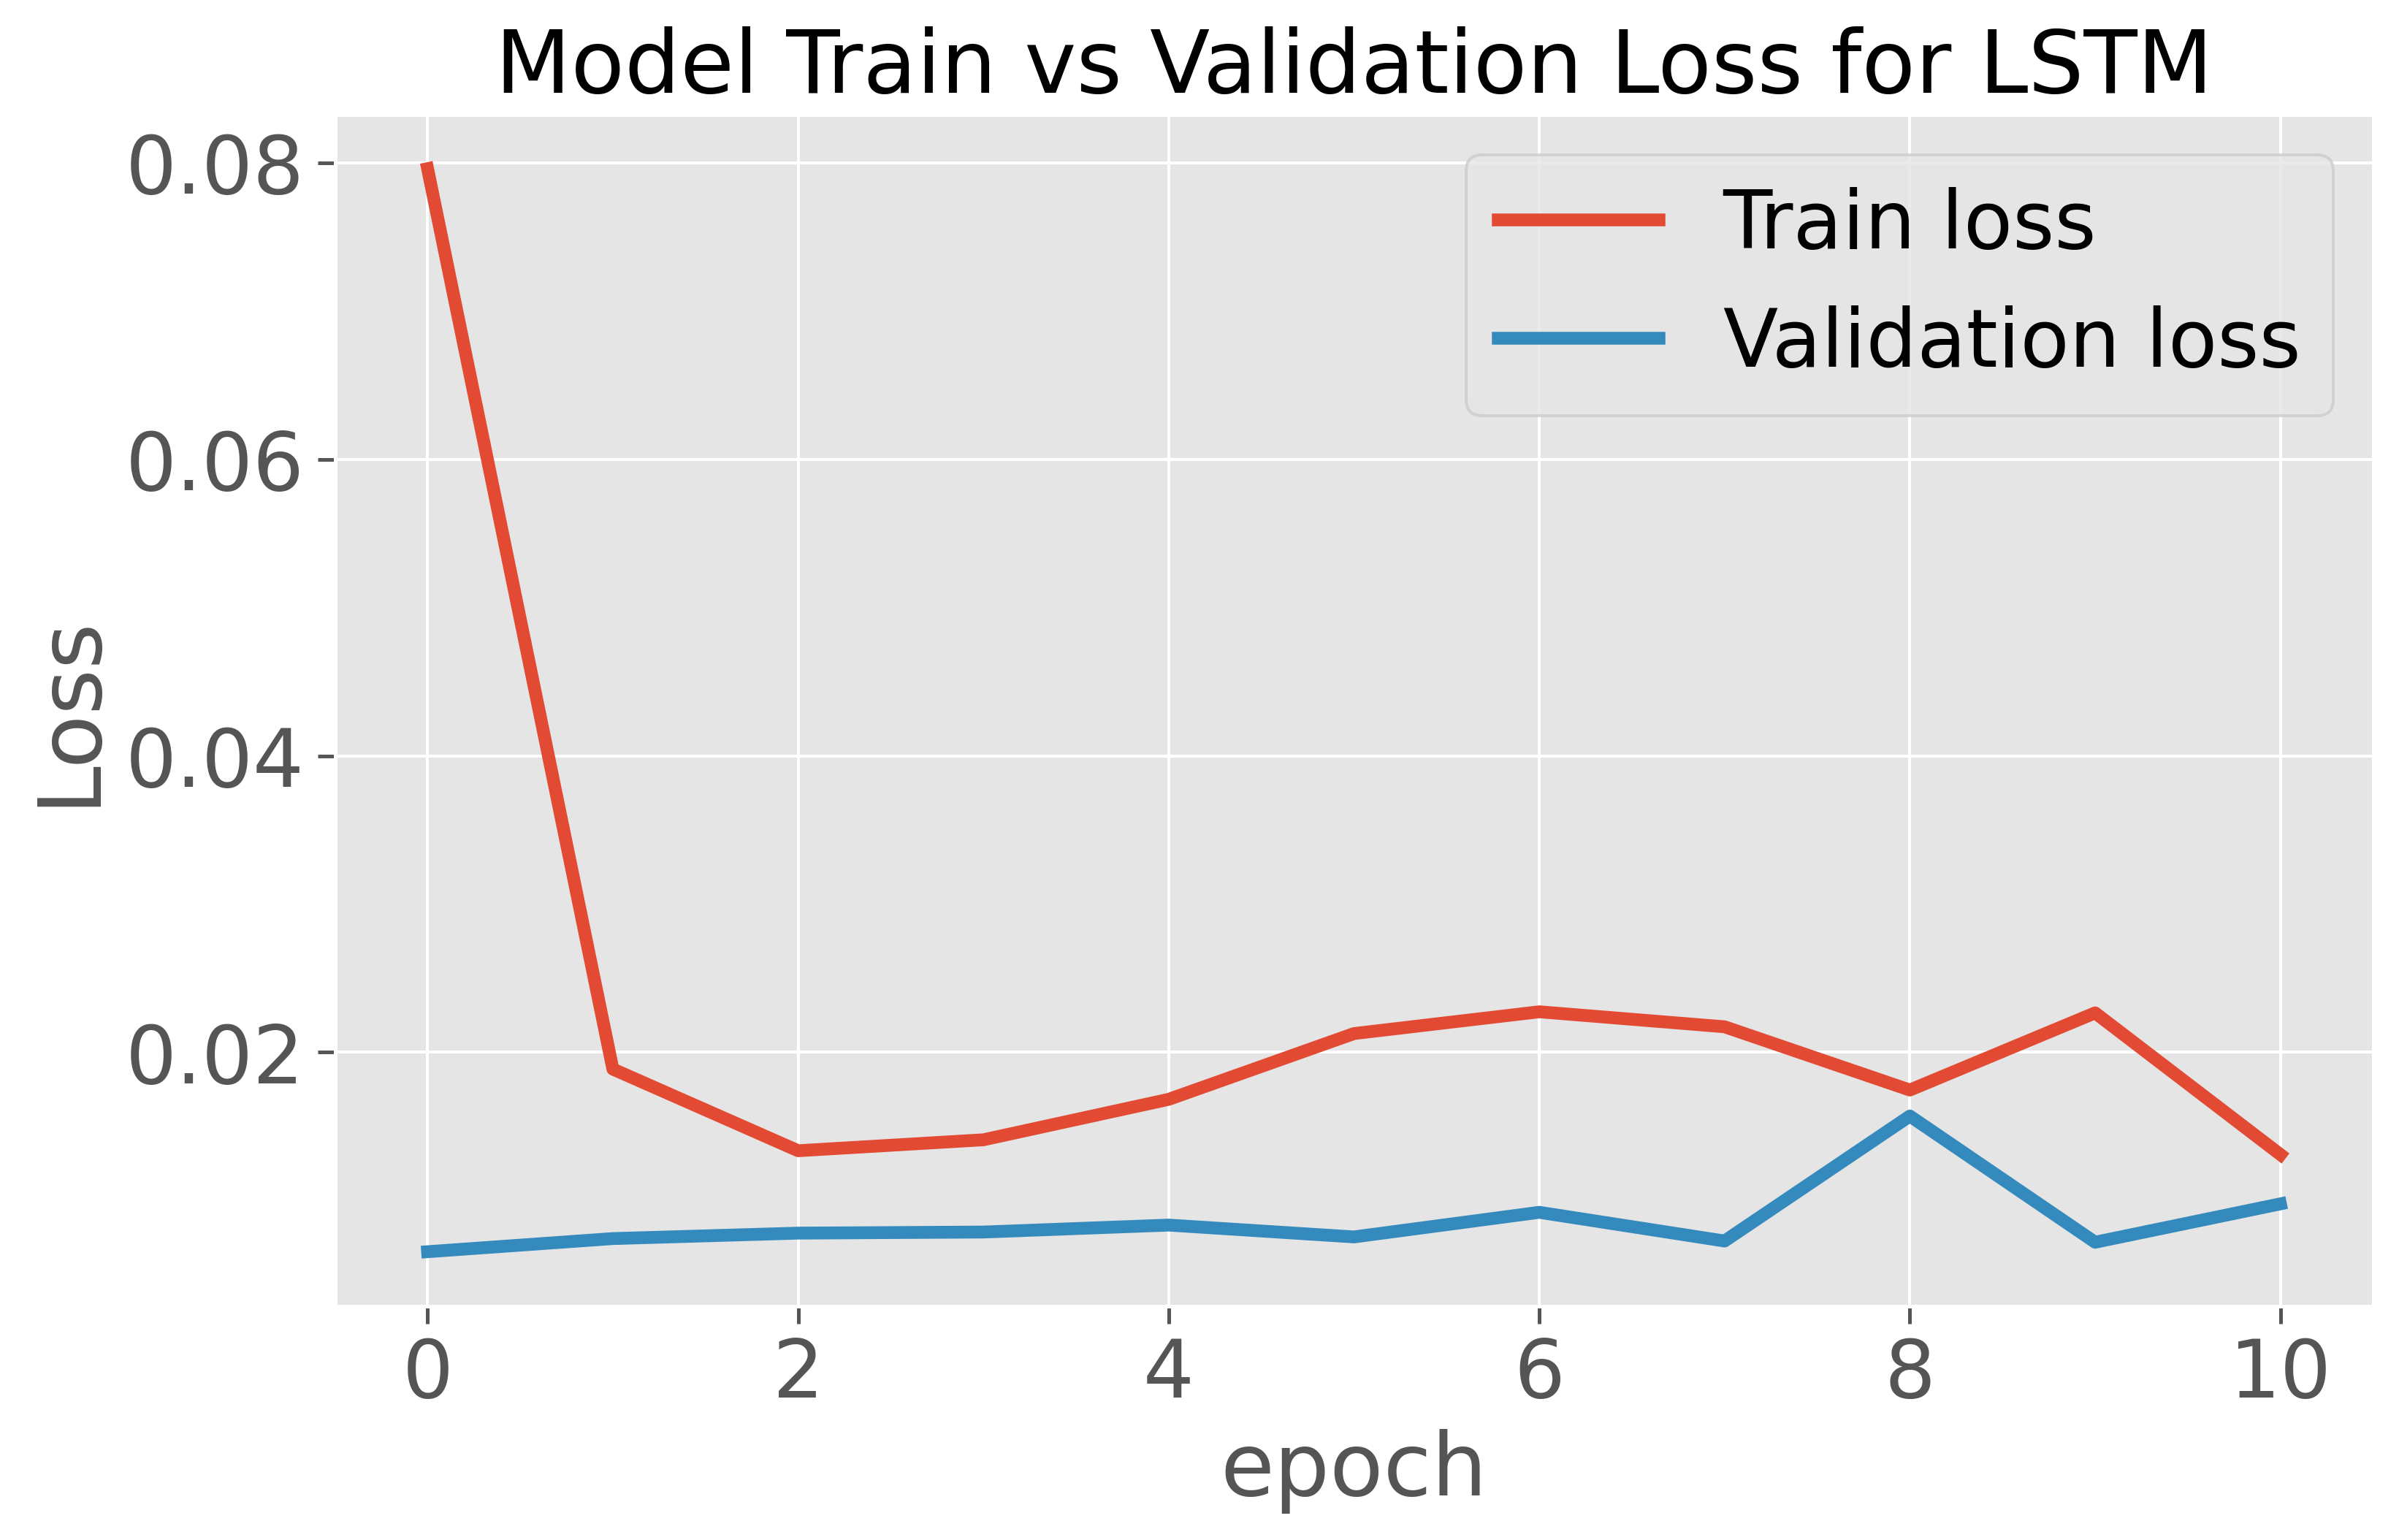

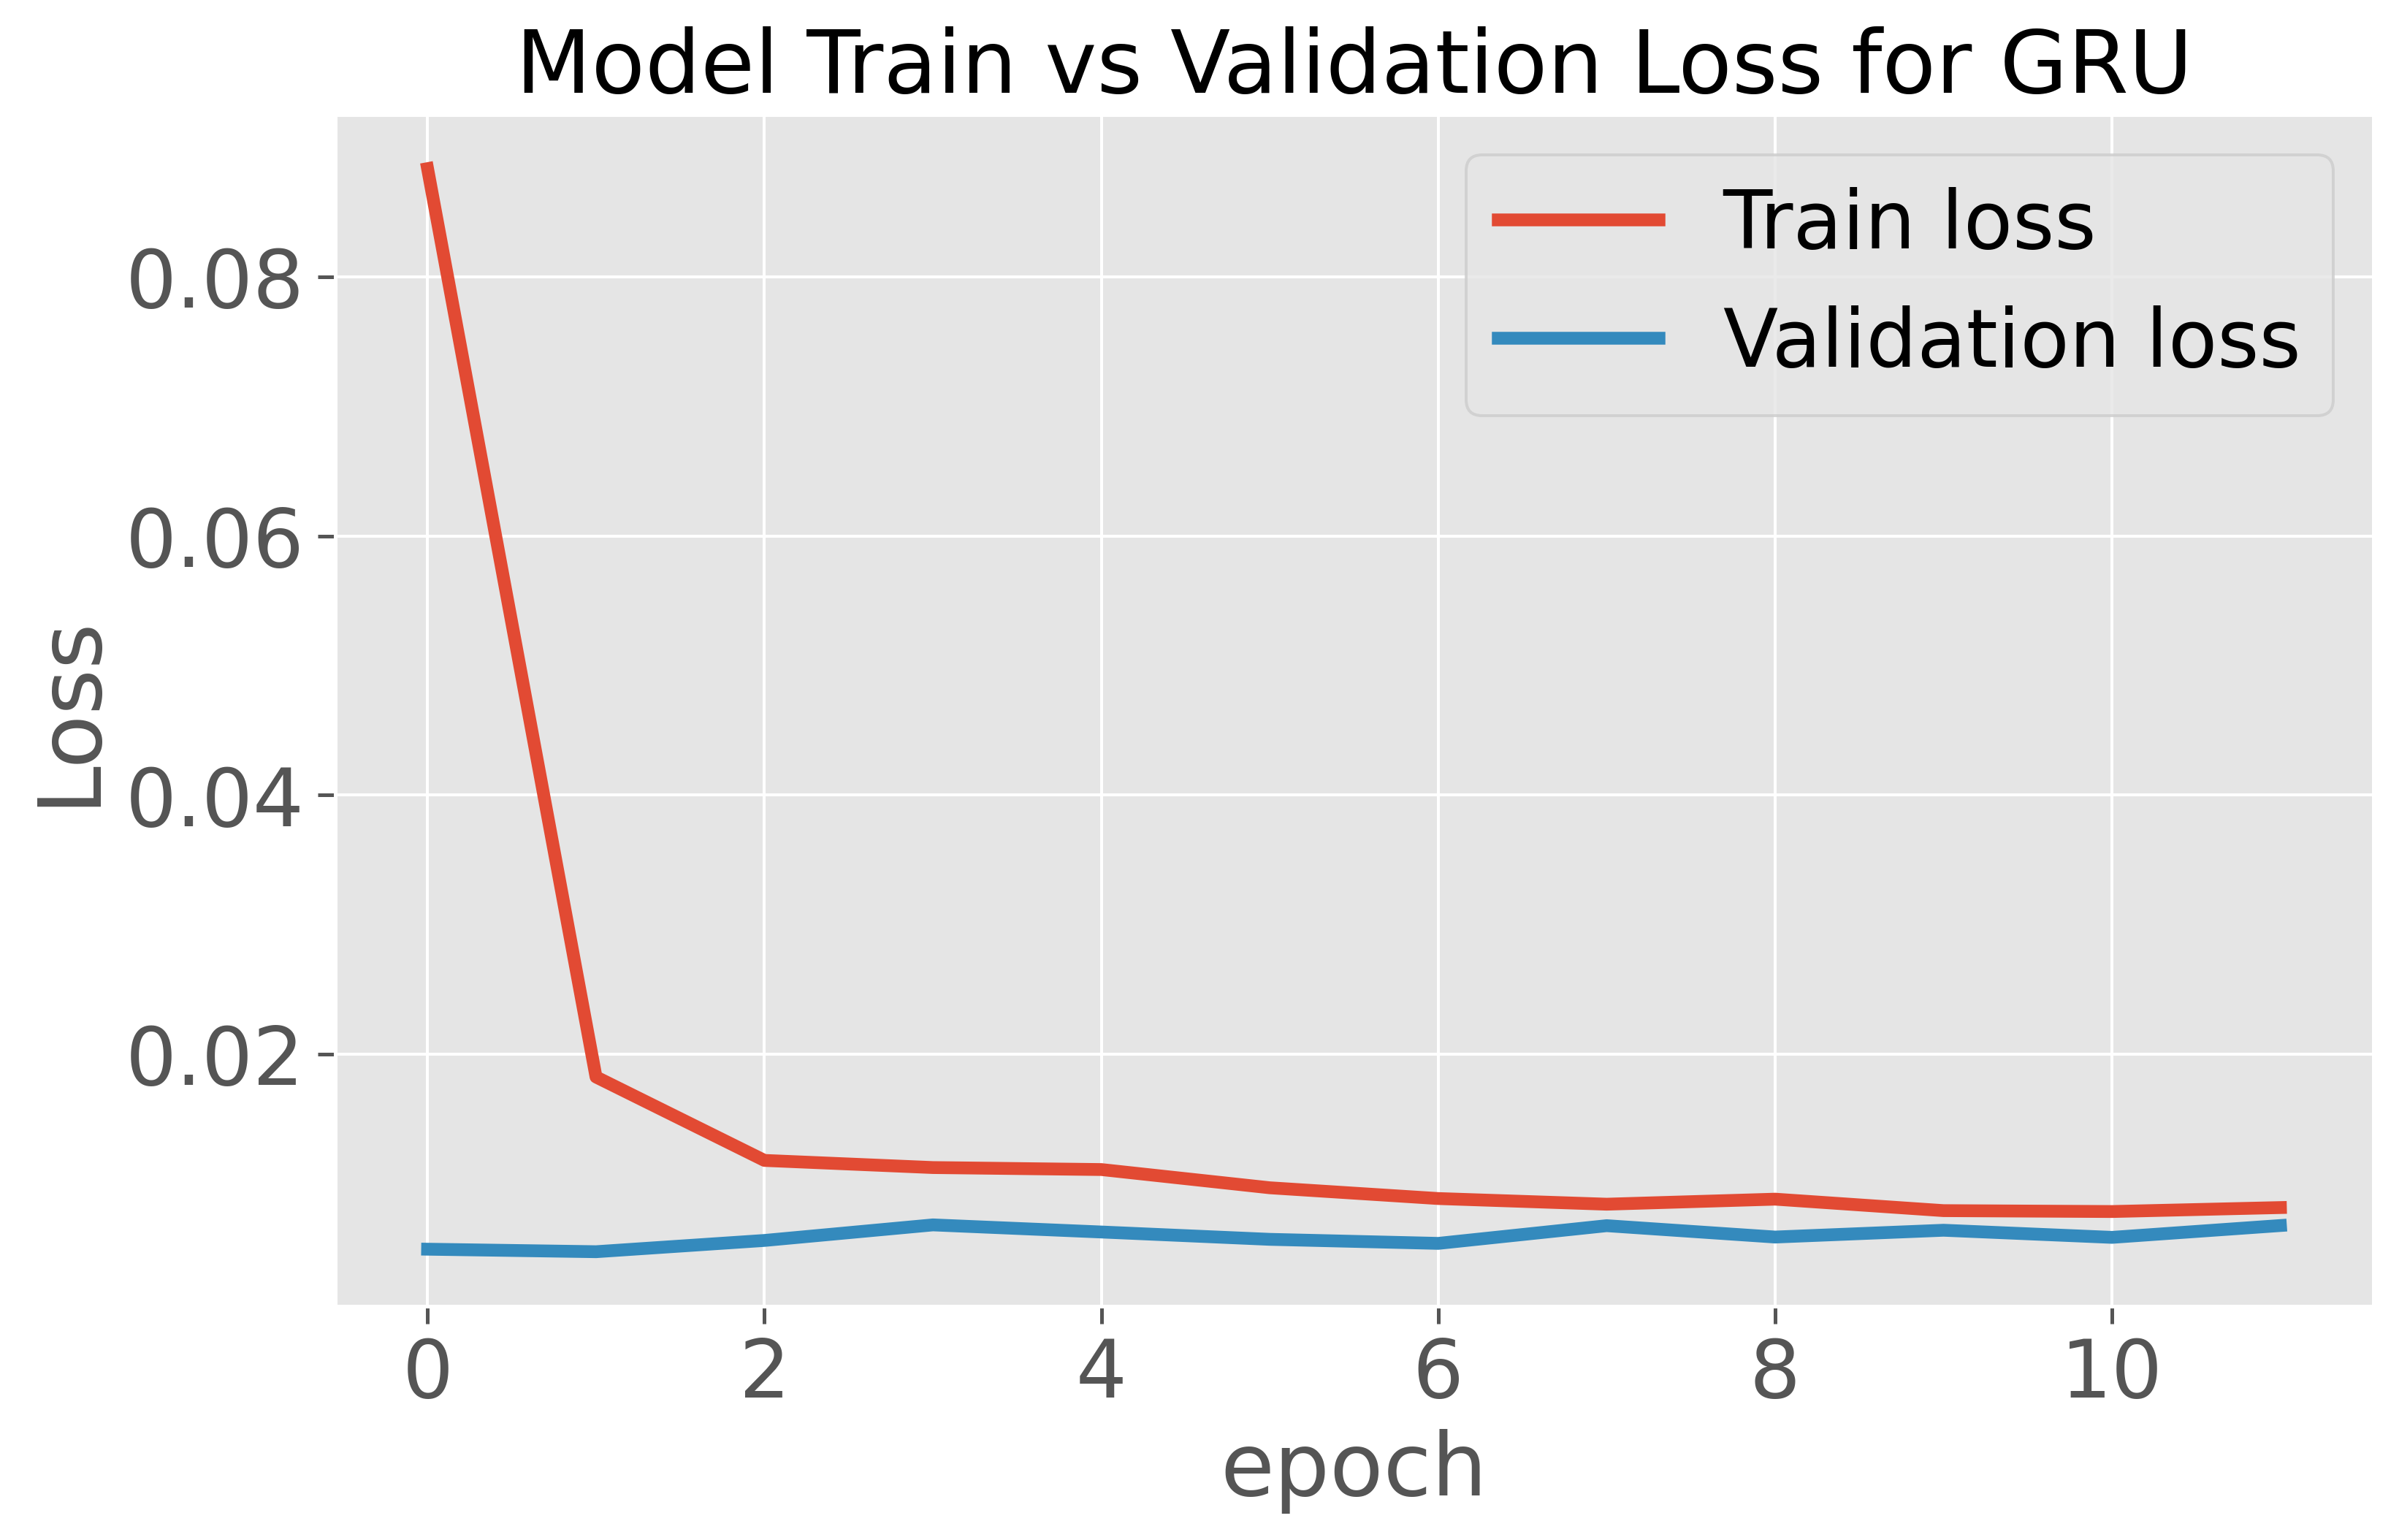

In [101]:
#Plot train and validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.rcParams['figure.dpi'] = 360
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

##Inverse scale for prediction

Before we can make predictions on our data, we must use an inverse transform to return our outcome variable back to its original form. Recall that we scaled the data to a range from -1 to 1. If we don’t use an inverse function, then our predictions will be within this scaled range.

In [102]:
# Note that I have to use scaler_y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

##Making predictions on test data

Now is the moment we’ve all been waiting for! We will see which model performed best to predict Bitcoin price on the unseen test set. The results from these trials are presented in figure 3 below.

In [103]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

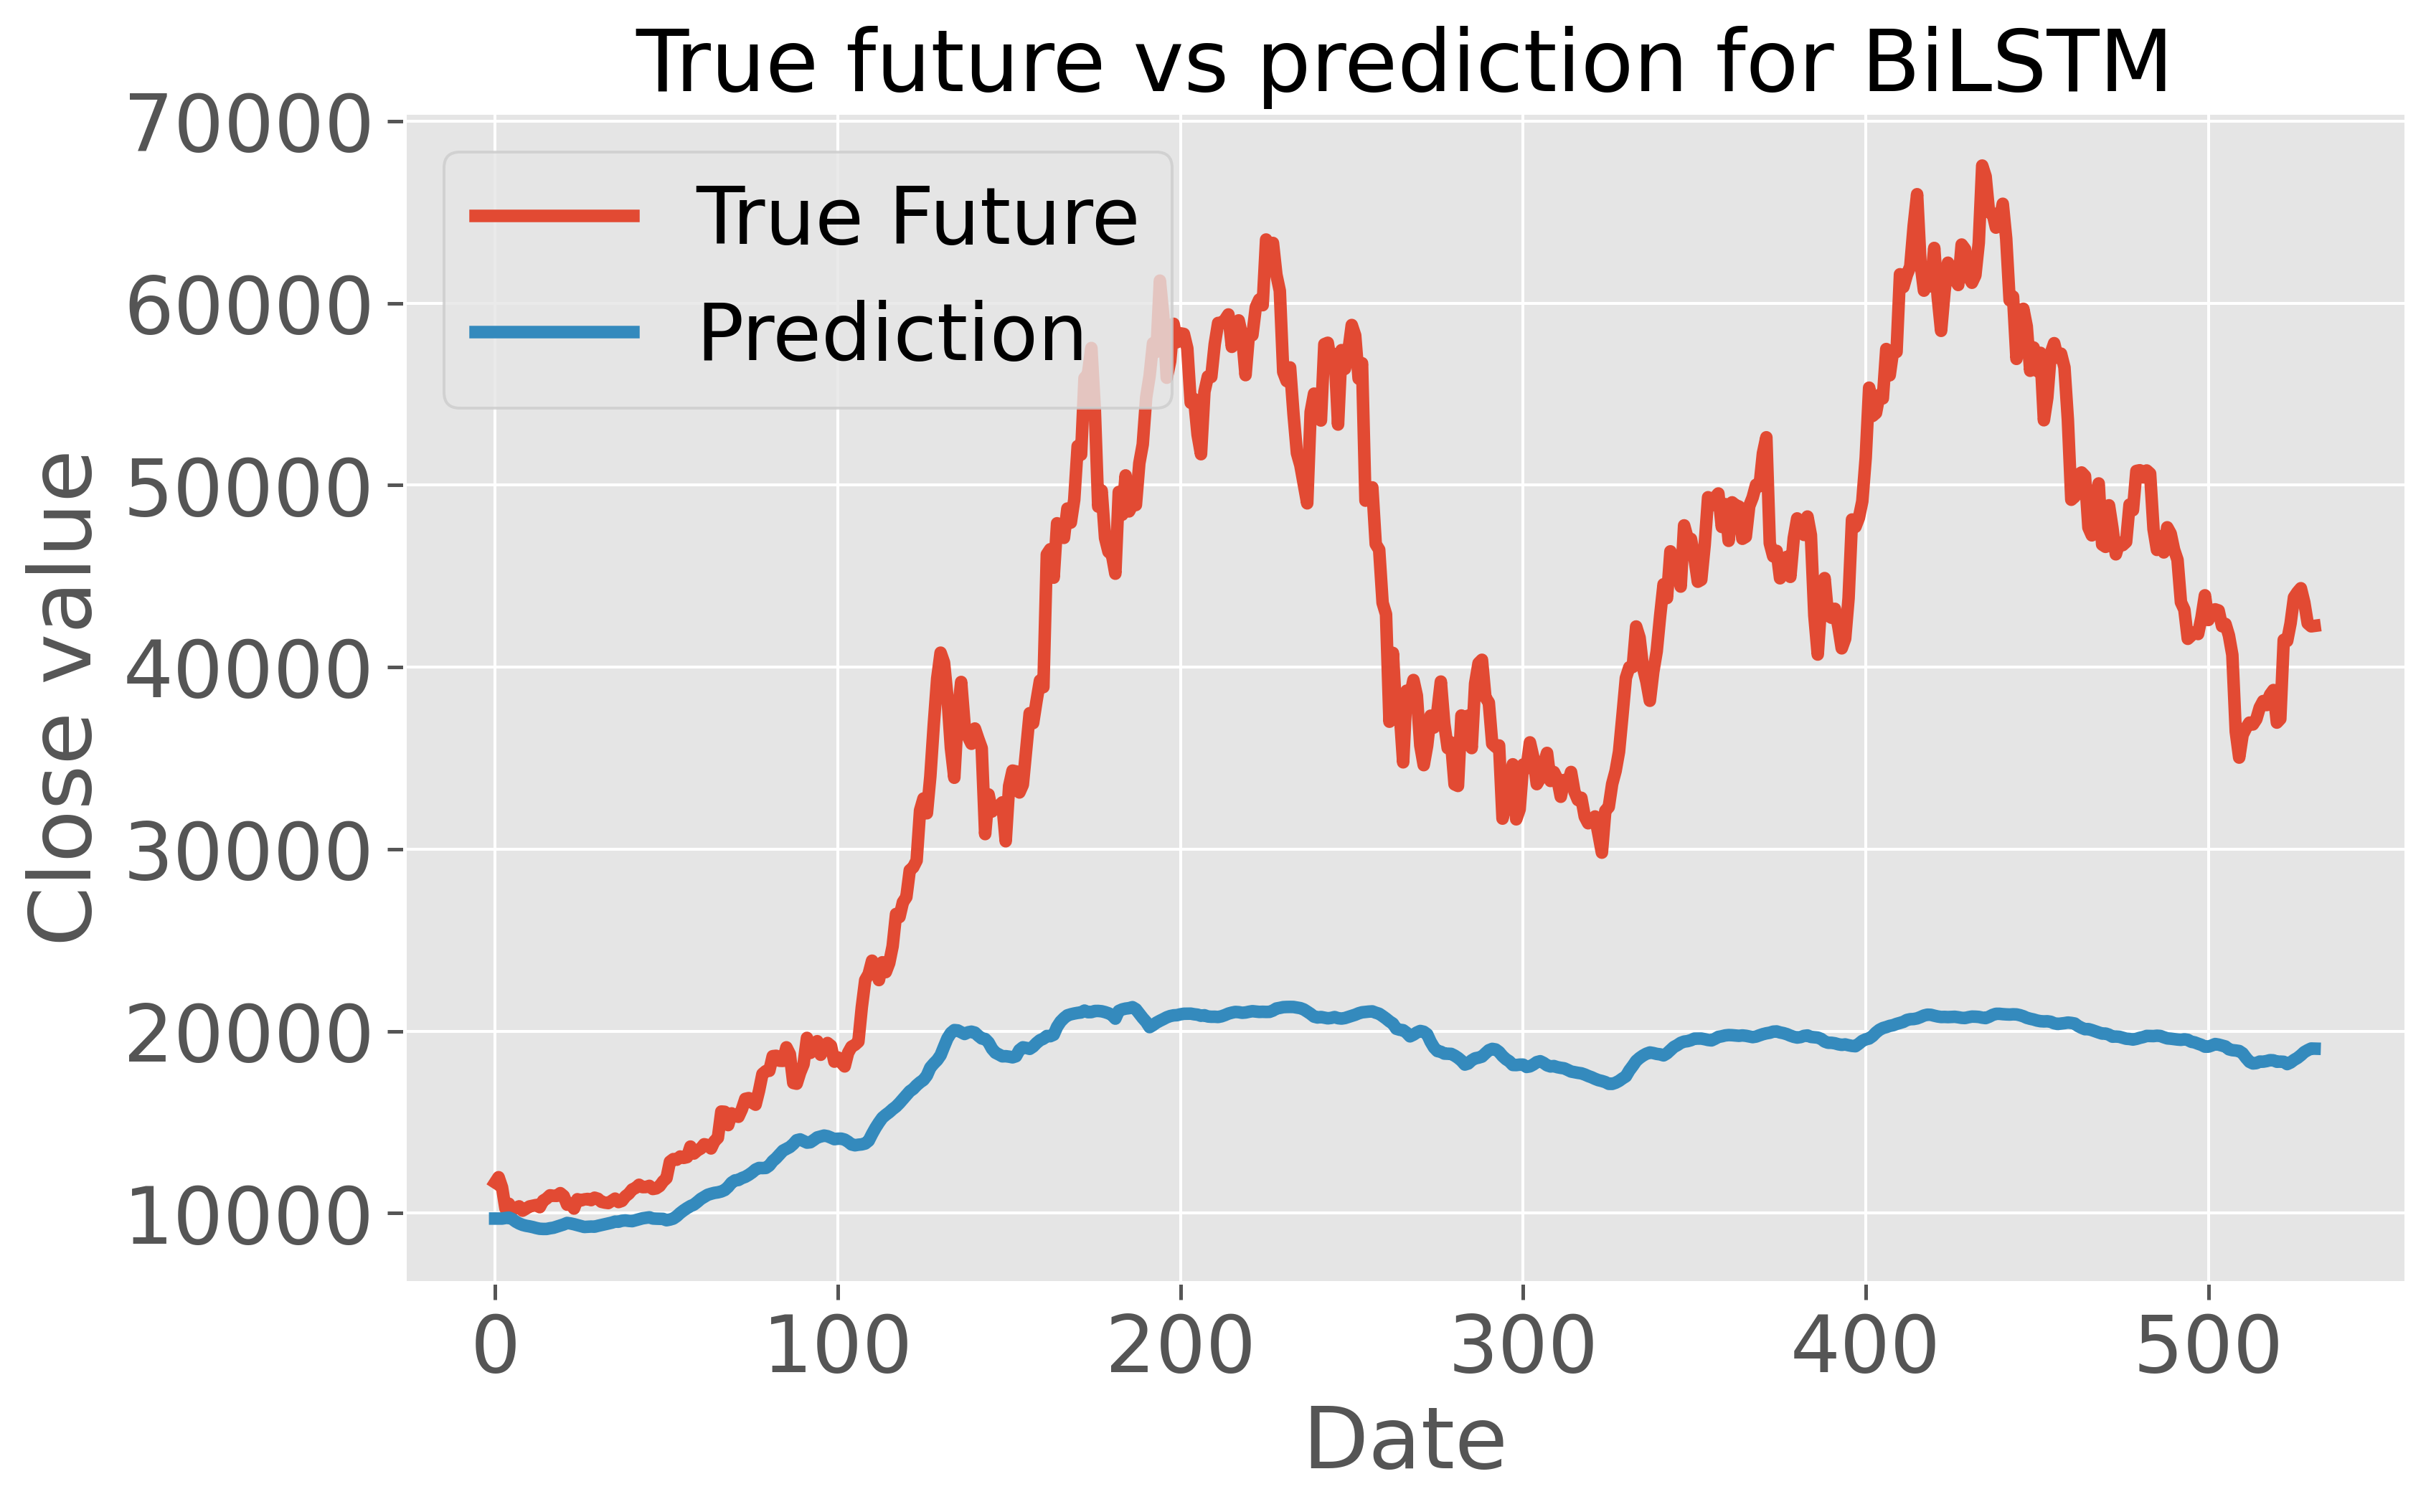

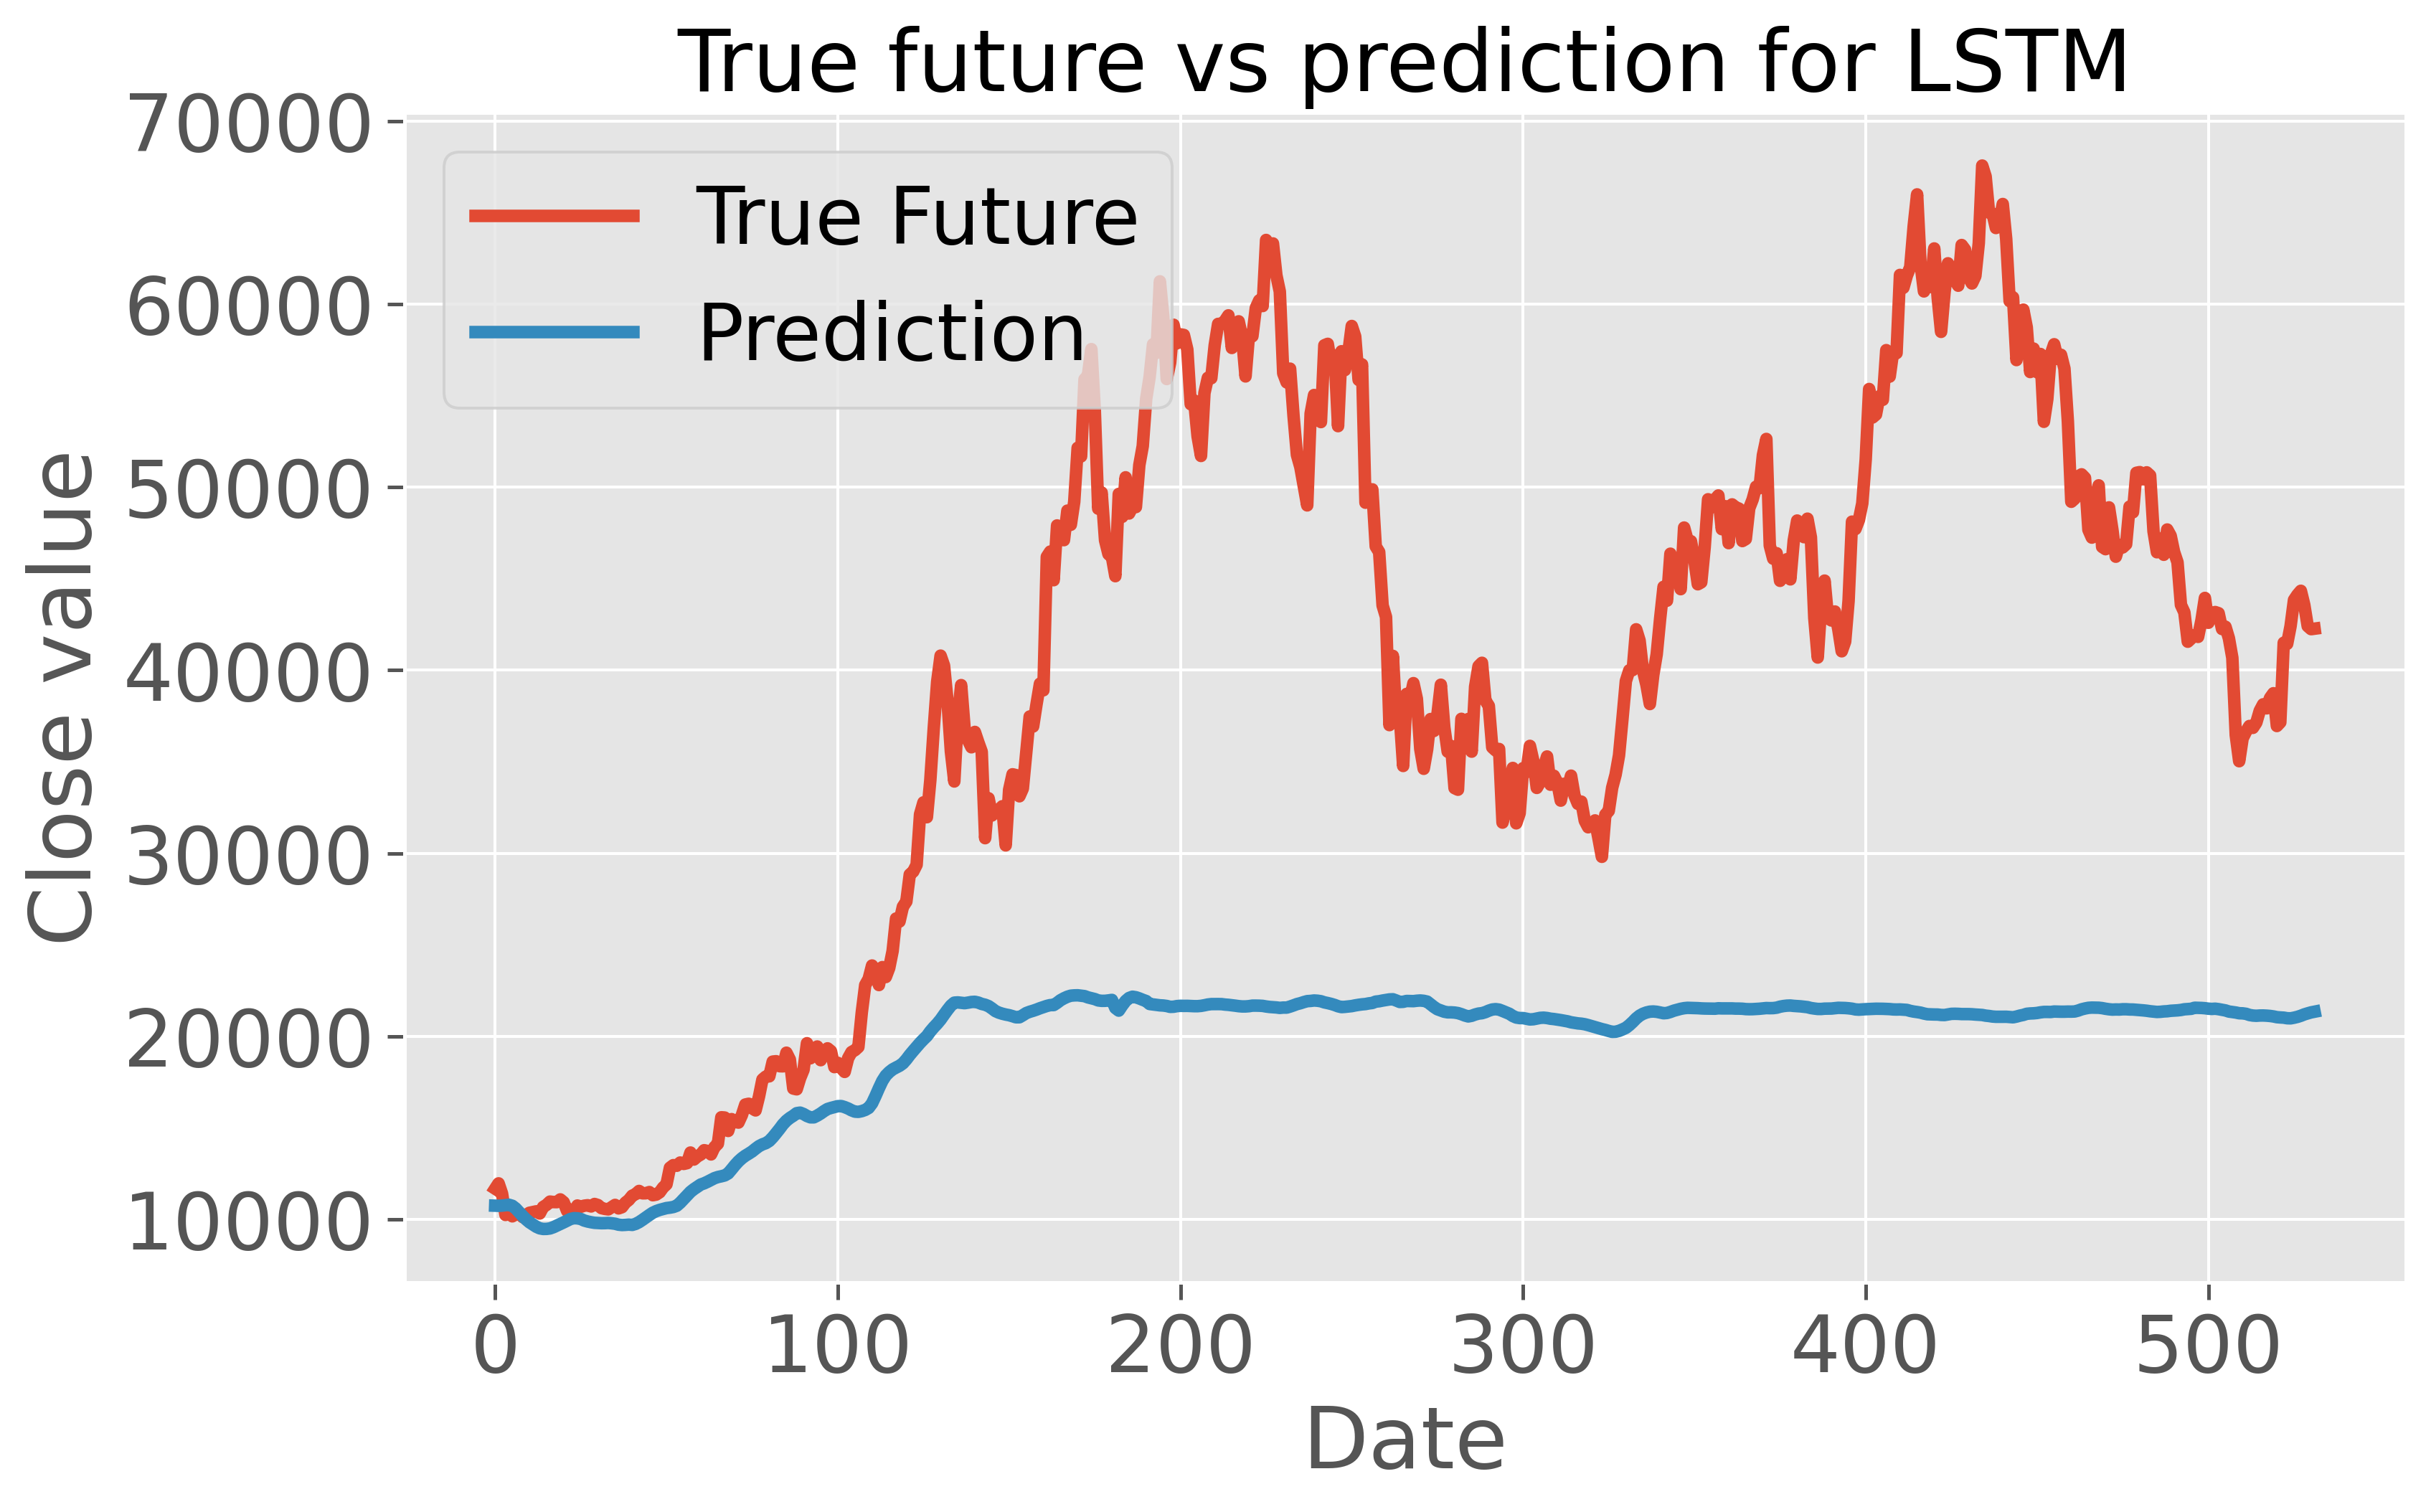

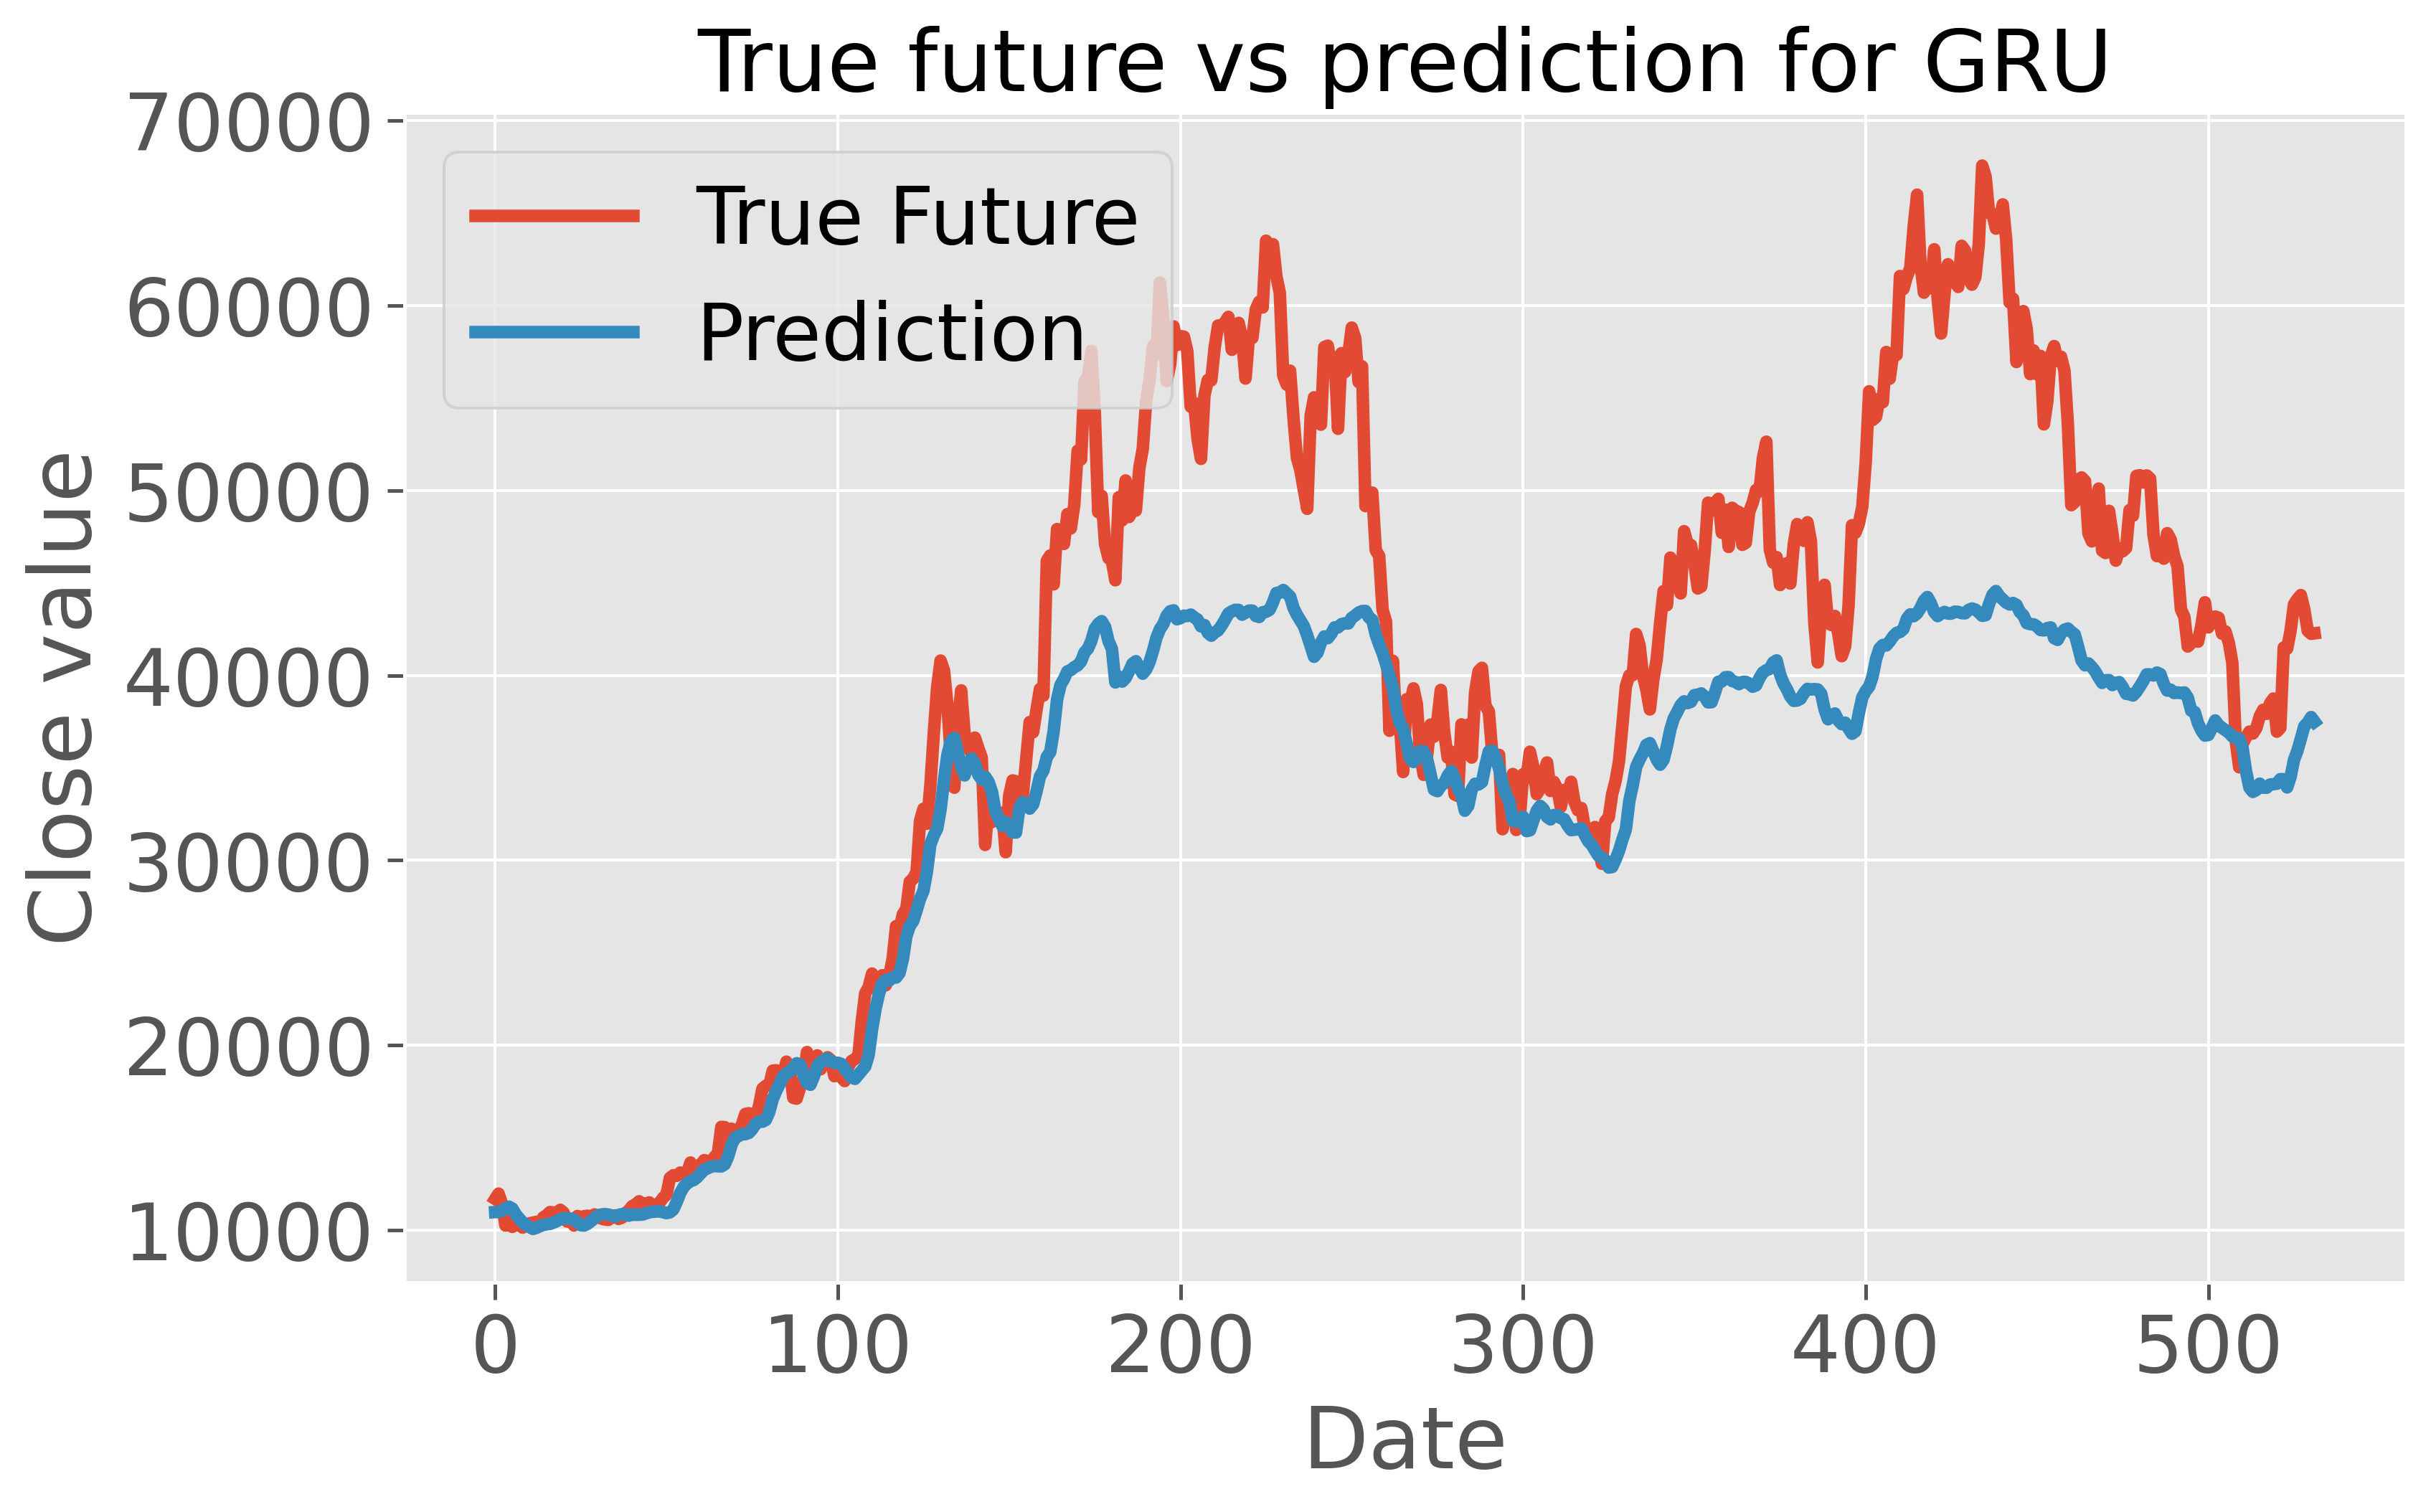

In [104]:
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    plt.rcParams['figure.dpi'] = 360
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Close value')
   
    
plot_future(prediction_bilstm, 'BiLSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)

As we can see, when inspected visually both the predicted values from the LSTM and BiLSTM follow the test data remarkably well until the sharp rise in values toward the end of the data set. On the other hand, the GRU model appears to have the best overall fit. Even if it doesn’t tightly follow the true data, it seems to be better at following the trends present in the data.

##Metrics

In [105]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 21653.2676
Root Mean Square Error: 24990.8091

LSTM:
Mean Absolute Error: 20071.0683
Root Mean Square Error: 23745.0691

GRU:
Mean Absolute Error: 6661.6764
Root Mean Square Error: 8937.0418



Above, a qualitative interpretation of the data was presented. Here, a function was created to provide a quantitative measure of accuracy for each model. Both Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are provided for all three models.

The GRU has the lower RMSE suggesting a more accurate model (using this metric).

From the above we can conclude that knowing the exact value for a bitcoin make no sense but if we know for the predicted bitcoin the graph is an upward or a downward trend. This would better guide the decision to buy or sell.

With that in mind, I feel that the GRU model performed better as an indicator of trend, rather than price. Next, we will use the GRU model to forecast future prices!

#Forecasting

###Web Scrapping

Web Scraping Yahoo Finance for Historical Stock Market Data using Selenium and BeautifulSoup in Python

There are mainly two ways to extract data from a website:

* Use the API of the website (if it exists). For example, Facebook has the Facebook Graph API which allows retrieval of data posted on Facebook.
* Access the HTML of the webpage and extract useful information/data from it. This technique is called web scraping or web harvesting or web data extraction.

Steps involved in web scraping:

1. Send an HTTP request to the URL of the webpage you want to access. The server responds to the request by returning the HTML content of the webpage. For this task, we will use a third-party HTTP library for python-requests.
2. Once we have accessed the HTML content, we are left with the task of parsing the data. Since most of the HTML data is nested, we cannot extract data simply through string processing. One needs a parser which can create a nested/tree structure of the HTML data. There are many HTML parser libraries available but the most advanced one is html5lib.
3. Now, all we need to do is navigating and searching the parse tree that we created, i.e. tree traversal. For this task, we will be using another third-party python library, Beautiful Soup. It is a Python library for pulling data out of HTML and XML files.


Selenium is a Python library and tool used for automating web browsers to do a number of tasks. One of such is web-scraping to extract useful data and information that may be otherwise unavailable

In [358]:
#YAHOO PAGE SETUP
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36' } 
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}

stockSymbol = 'BTC-USD'
url = 'https://finance.yahoo.com/quote/'+ stockSymbol + '/history?p=' + stockSymbol
page = requests.get(url, headers=headers, timeout=5) 
# time.sleep(50)

In [359]:
print(type(page))
tree = html.fromstring(page.content)
header = tree.xpath('//*[contains(@class, "BdT Bdc($seperatorColor) Ta(end)")]/td/span/text()')

<class 'requests.models.Response'>


In [360]:
df=[]
for i in range(1,len(header),7):
  df.append(header[i:i+7])

In [361]:
df1 = pd.DataFrame(df)

In [362]:
df1

,0,1,2,3,4,5,6
0,"38,303.20","38,897.75","38,223.98","38,779.07","38,779.07","38,924,144,640","Feb 24, 2022"
1,"Feb 23, 2022","38,285.28","39,122.39","37,201.82","37,296.57","37,296.57","21,849,073,843"
2,"Feb 22, 2022","37,068.77","38,359.86","36,488.93","38,286.03","38,286.03","25,493,150,450"
3,"Feb 21, 2022","38,423.21","39,394.44","36,950.48","37,075.28","37,075.28","29,280,402,798"
4,"Feb 20, 2022","40,118.10","40,119.89","38,112.81","38,431.38","38,431.38","18,340,576,452"
...,...,...,...,...,...,...,...
94,"Nov 22, 2021","58,706.85","59,266.36","55,679.84","56,289.29","56,289.29","35,036,121,783"
95,"Nov 21, 2021","59,730.51","60,004.43","58,618.93","58,730.48","58,730.48","26,123,447,605"
96,"Nov 20, 2021","58,115.08","59,859.88","57,469.73","59,697.20","59,697.20","30,624,264,863"
97,"Nov 19, 2021","56,896.13","58,351.11","55,705.18","58,119.58","58,119.58","38,702,407,772"


In [363]:
old_names = ['0', '1', '2', '3', '4','5','6'] 
new_names = ['Date', 'Open', 'High', 'Low', 'Close','Adj Close**','Volume']
df1.columns = new_names

In [364]:
df1

,Date,Open,High,Low,Close,Adj Close**,Volume
0,"38,303.20","38,897.75","38,223.98","38,779.07","38,779.07","38,924,144,640","Feb 24, 2022"
1,"Feb 23, 2022","38,285.28","39,122.39","37,201.82","37,296.57","37,296.57","21,849,073,843"
2,"Feb 22, 2022","37,068.77","38,359.86","36,488.93","38,286.03","38,286.03","25,493,150,450"
3,"Feb 21, 2022","38,423.21","39,394.44","36,950.48","37,075.28","37,075.28","29,280,402,798"
4,"Feb 20, 2022","40,118.10","40,119.89","38,112.81","38,431.38","38,431.38","18,340,576,452"
...,...,...,...,...,...,...,...
94,"Nov 22, 2021","58,706.85","59,266.36","55,679.84","56,289.29","56,289.29","35,036,121,783"
95,"Nov 21, 2021","59,730.51","60,004.43","58,618.93","58,730.48","58,730.48","26,123,447,605"
96,"Nov 20, 2021","58,115.08","59,859.88","57,469.73","59,697.20","59,697.20","30,624,264,863"
97,"Nov 19, 2021","56,896.13","58,351.11","55,705.18","58,119.58","58,119.58","38,702,407,772"


In [365]:
df1 = df1.iloc[3:]

In [366]:
# df1 = df1.iloc[::-1]

In [367]:
df1

,Date,Open,High,Low,Close,Adj Close**,Volume
3,"Feb 21, 2022","38,423.21","39,394.44","36,950.48","37,075.28","37,075.28","29,280,402,798"
4,"Feb 20, 2022","40,118.10","40,119.89","38,112.81","38,431.38","38,431.38","18,340,576,452"
5,"Feb 19, 2022","40,026.02","40,418.88","39,713.06","40,122.16","40,122.16","13,736,557,863"
6,"Feb 18, 2022","40,552.13","40,929.15","39,637.62","40,030.98","40,030.98","23,310,007,704"
7,"Feb 17, 2022","43,937.07","44,132.97","40,249.37","40,538.01","40,538.01","26,246,662,813"
...,...,...,...,...,...,...,...
94,"Nov 22, 2021","58,706.85","59,266.36","55,679.84","56,289.29","56,289.29","35,036,121,783"
95,"Nov 21, 2021","59,730.51","60,004.43","58,618.93","58,730.48","58,730.48","26,123,447,605"
96,"Nov 20, 2021","58,115.08","59,859.88","57,469.73","59,697.20","59,697.20","30,624,264,863"
97,"Nov 19, 2021","56,896.13","58,351.11","55,705.18","58,119.58","58,119.58","38,702,407,772"


In [368]:
# df1.reset_index(drop=True, inplace=True)

In [369]:
df1 = df1.iloc[:13]

In [370]:
df1.shape

(13, 7)

In [371]:
df1.replace(',','', regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [372]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 3 to 15
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         13 non-null     object
 1   Open         13 non-null     object
 2   High         13 non-null     object
 3   Low          13 non-null     object
 4   Close        13 non-null     object
 5   Adj Close**  13 non-null     object
 6   Volume       13 non-null     object
dtypes: object(7)
memory usage: 860.0+ bytes


In [373]:
df1

,Date,Open,High,Low,Close,Adj Close**,Volume
3,Feb 21 2022,38423.21,39394.44,36950.48,37075.28,37075.28,29280402798
4,Feb 20 2022,40118.10,40119.89,38112.81,38431.38,38431.38,18340576452
5,Feb 19 2022,40026.02,40418.88,39713.06,40122.16,40122.16,13736557863
6,Feb 18 2022,40552.13,40929.15,39637.62,40030.98,40030.98,23310007704
7,Feb 17 2022,43937.07,44132.97,40249.37,40538.01,40538.01,26246662813
8,Feb 16 2022,44578.28,44578.28,43456.69,43961.86,43961.86,19792547657
9,Feb 15 2022,42586.46,44667.22,42491.04,44575.20,44575.20,22721659051
10,Feb 14 2022,42157.40,42775.78,41681.96,42586.92,42586.92,20827783012
11,Feb 13 2022,42236.57,42693.05,41950.94,42197.52,42197.52,14741589015
12,Feb 12 2022,42412.30,42992.55,41852.57,42244.47,42244.47,18152390304


In [374]:
a=['Open','High','Low','Close','Volume']
for i in a:
  df1[i]= df1[i].astype(str).astype(float)

df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close**,Volume
3,Feb 21 2022,38423,39394,36950,37075,37075.28,29280402798
4,Feb 20 2022,40118,40120,38113,38431,38431.38,18340576452
5,Feb 19 2022,40026,40419,39713,40122,40122.16,13736557863
6,Feb 18 2022,40552,40929,39638,40031,40030.98,23310007704
7,Feb 17 2022,43937,44133,40249,40538,40538.01,26246662813
8,Feb 16 2022,44578,44578,43457,43962,43961.86,19792547657
9,Feb 15 2022,42586,44667,42491,44575,44575.20,22721659051
10,Feb 14 2022,42157,42776,41682,42587,42586.92,20827783012
11,Feb 13 2022,42237,42693,41951,42198,42197.52,14741589015
12,Feb 12 2022,42412,42993,41853,42244,42244.47,18152390304


In [375]:
# We see Date is an object, so we have to convert it to datetime
df1['Date'] = df1['Date'].astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [376]:
# set Date as index
df1 = df1.set_index('Date')

In [377]:
#Dropping the unwanted columns
df1 = df1.drop(columns=['Close'])
df1 = df1.drop(columns=['Adj Close**'])

In [378]:
df1

,Open,High,Low,Volume
Date,,,,
2022-02-21,38423,39394,36950,29280402798
2022-02-20,40118,40120,38113,18340576452
2022-02-19,40026,40419,39713,13736557863
2022-02-18,40552,40929,39638,23310007704
2022-02-17,43937,44133,40249,26246662813
2022-02-16,44578,44578,43457,19792547657
2022-02-15,42586,44667,42491,22721659051
2022-02-14,42157,42776,41682,20827783012
2022-02-13,42237,42693,41951,14741589015


In [379]:
X_new = df1.iloc[0:14]

In [380]:
X_new

,Open,High,Low,Volume
Date,,,,
2022-02-21,38423,39394,36950,29280402798
2022-02-20,40118,40120,38113,18340576452
2022-02-19,40026,40419,39713,13736557863
2022-02-18,40552,40929,39638,23310007704
2022-02-17,43937,44133,40249,26246662813
2022-02-16,44578,44578,43457,19792547657
2022-02-15,42586,44667,42491,22721659051
2022-02-14,42157,42776,41682,20827783012
2022-02-13,42237,42693,41951,14741589015


In [381]:
df1.shape

(13, 4)

In [382]:
df1.dtypes

Open      float64
High      float64
Low       float64
Volume    float64
dtype: object

In [383]:
df1.Volume = df1.Volume.astype(float)

In [384]:
# Plot history and future data
def plot_history_future(y_train, prediction, model_name):
    
    plt.figure(figsize=(10, 6))
    
    range_history = len(y_train)
    range_future = list(range(range_history, range_history + len(prediction)))

    plt.plot(np.arange(range_history), np.array(y_train), label='History')
    plt.plot(range_future, np.array(prediction),label='Prediction')

    plt.title('History and prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Close value')

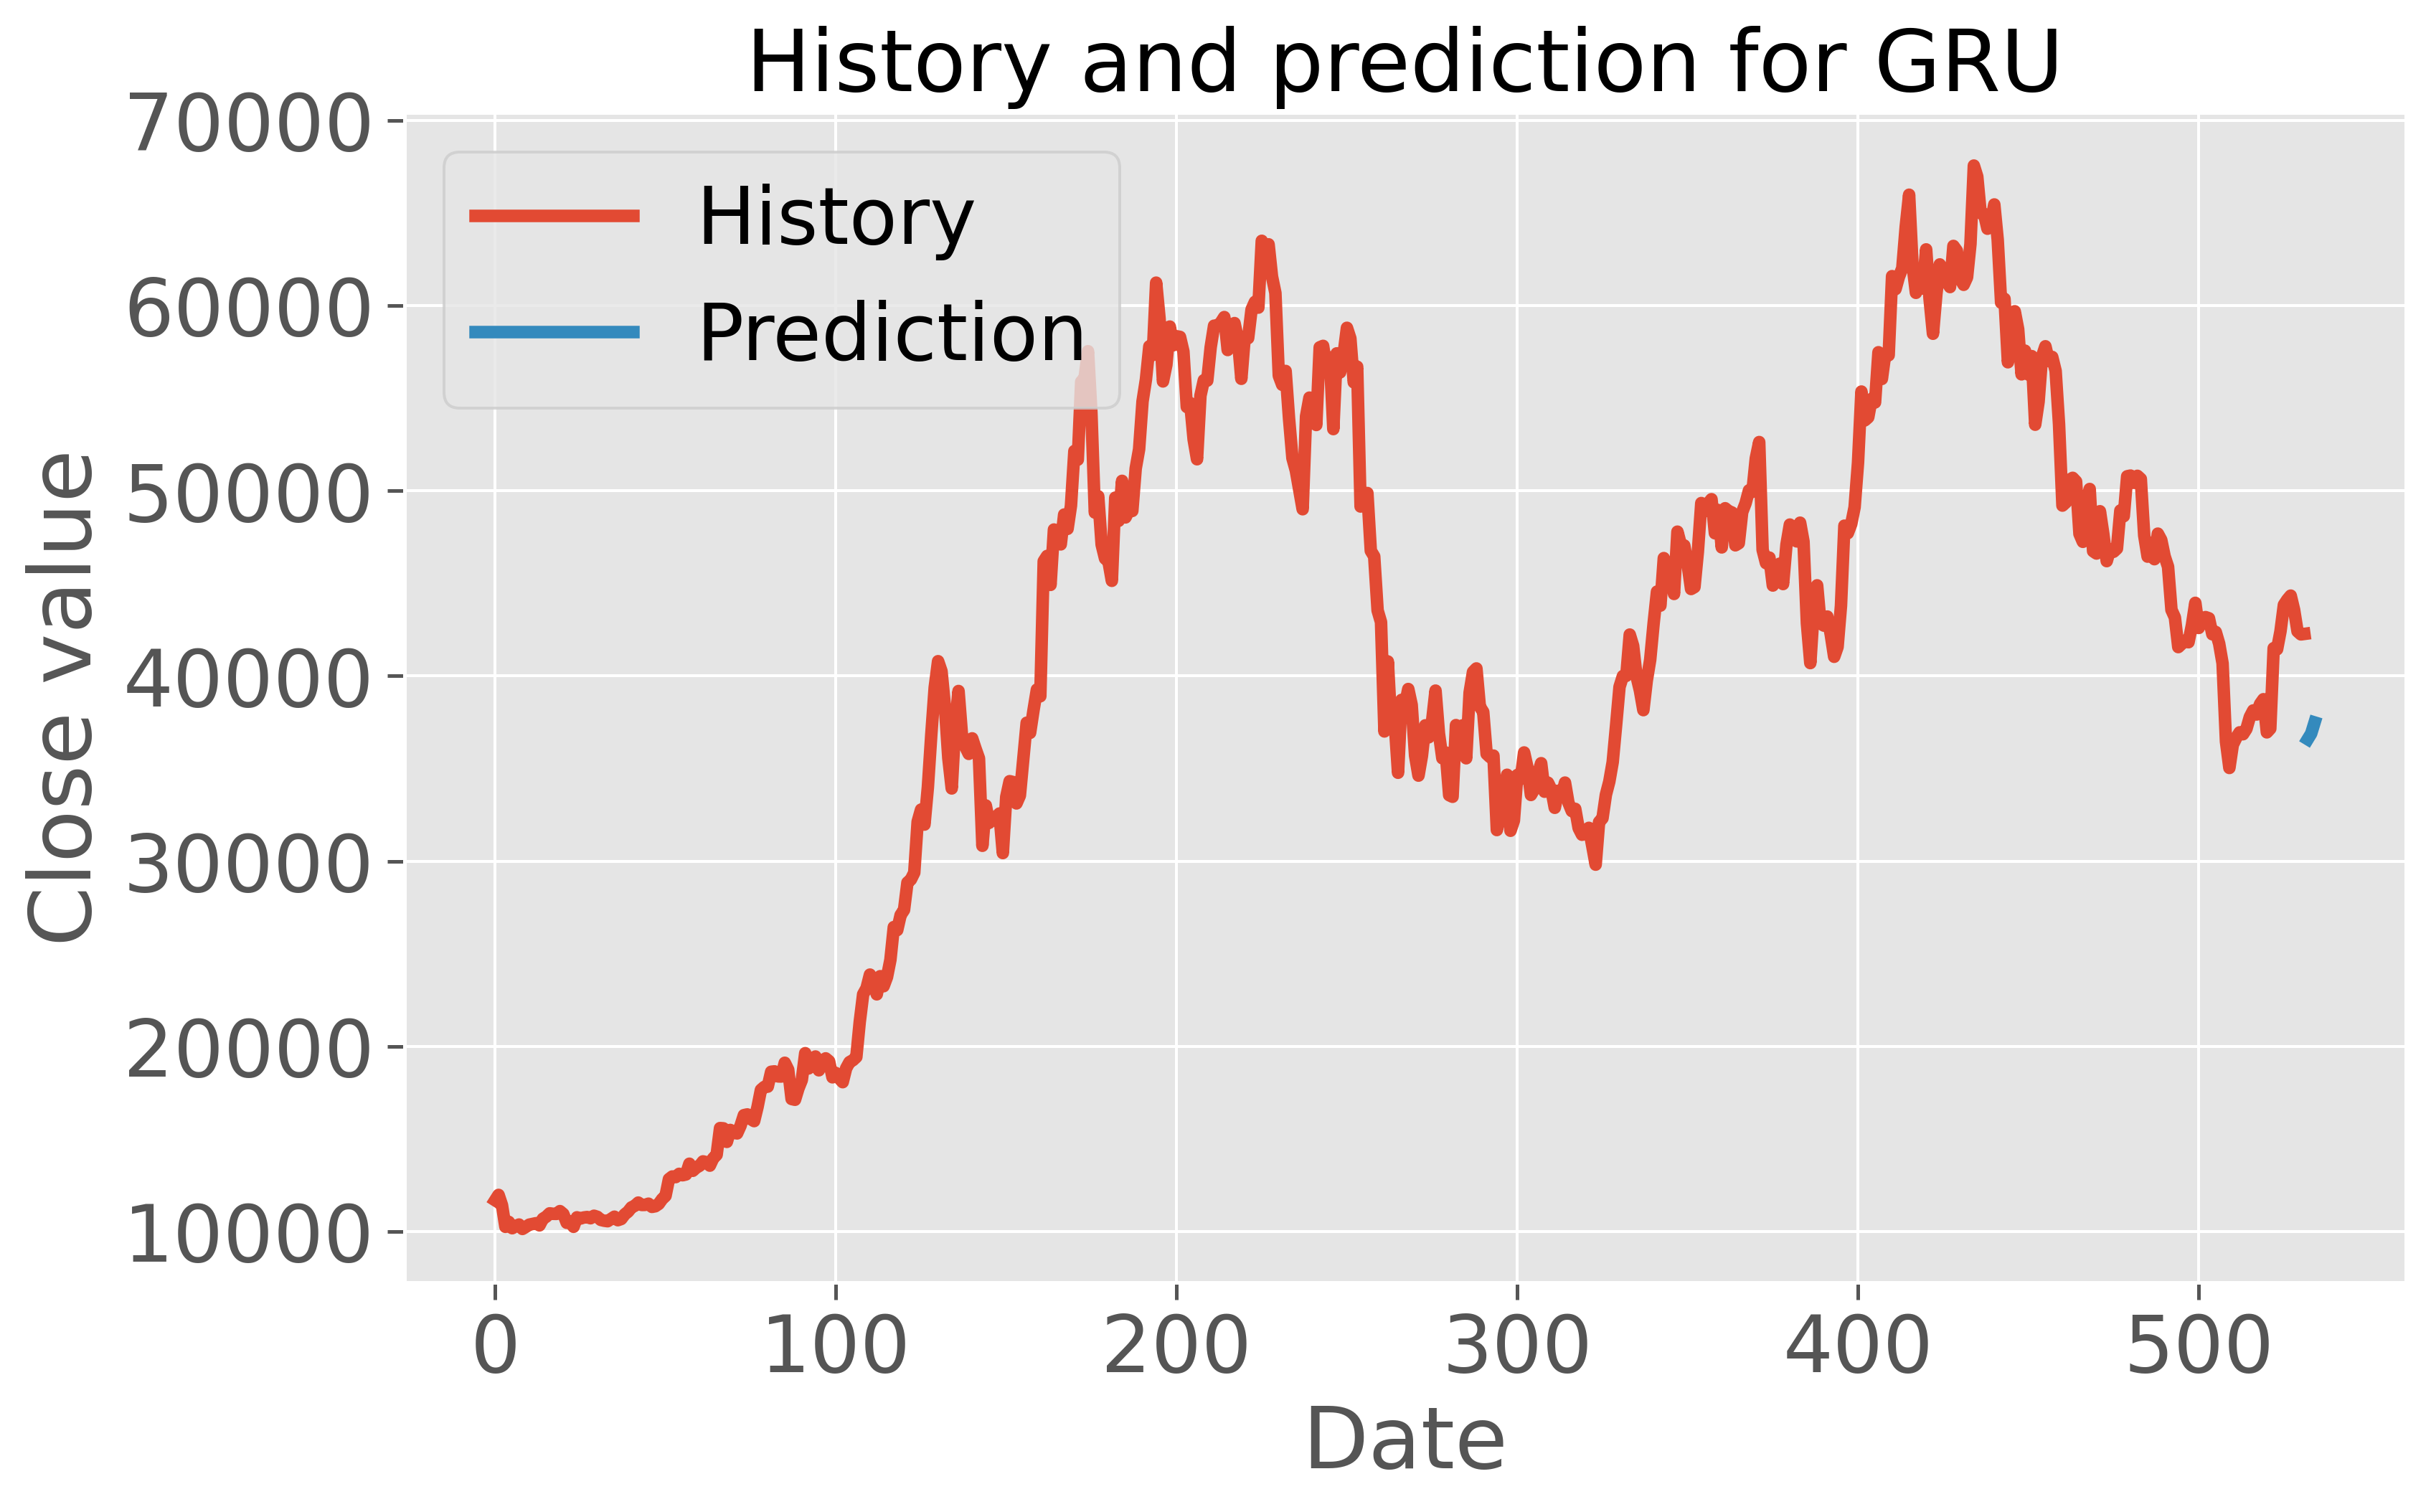

In [385]:
def forecast(X_input, time_steps):
    # Scale the forecast input with the scaler fit on the training data
    X = input_scaler.transform(X_input)
    
    # Reshape forecast data as 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        
    X_transformed = np.array(Xs)

    # Make prediction for forecast data using GRU model 
    prediction = model_gru.predict(X_transformed)
    prediction_actual = scaler_y.inverse_transform(prediction)
    return prediction_actual



prediction = forecast(X_new, TIME_STEPS)
plot_history_future(y_test, prediction,'GRU')

In [386]:
prediction

array([[36586.61 ],
       [36888.023],
       [37487.41 ]], dtype=float32)

#Conclusions

I tested the efficacy of LSTM, BiLSTM, and GRU models on predicting Bitcoin prices. After providing a general overview of the models, I described methods to prepare the data to avoid the dreaded cryptic error messages.

After training the models, they were each put to the test. Each performed rather well, but the GRU model was found to be a better indicator of trend, which I felt would be more relevant from a trading perspective.

When the GRU model was used to forecast values, it performed quite well. Although the prices were not predicted exactly, the trend was on point!